# SC1015 Mini Project Z136 Group 6
## Project Title: Nepal Earthquake Damage Analysis

#### Our chosen dataset is the 2015 Nepal Earthquake building structural damage and repair dataset. The dataset that we will be using was aimed to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal. The Earthquake had a magnitude of 6.5, followed by an aftershock of roughly 5.0 magnitude.

#### Our group's perspective is that earthquake's are costly and disastrous depending on the preparations made beforehand. If we do not prepare, it is highly unlikely that we might come out of the disaster unscathed.

#### As a result, our group has defined a new problem based on this dataset which is "Which building materials contribute to the building's damage grade?"


#### Concurrently, through our exploration, we will work on our second objective: "Does building age contribute to damage grade?" (Find by linear regression graph?????)

#### The motivation of our second objective is to understand the durability of each material used for building. Some buildings, despite being designed to endure earthquakes, can be damaged.

In [1]:
# Basic Libraries
from dython.nominal import associations
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import warnings
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
eq_data = pd.read_csv ("csv_building_structure.csv")
eq_data.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [3]:
print("Data type:", type(eq_data))
print("Data dims:", eq_data.shape)

Data type: <class 'pandas.core.frame.DataFrame'>
Data dims: (762106, 31)


In [4]:
print(eq_data.dtypes)

building_id                                int64
district_id                                int64
vdcmun_id                                  int64
ward_id                                    int64
count_floors_pre_eq                        int64
count_floors_post_eq                       int64
age_building                               int64
plinth_area_sq_ft                          int64
height_ft_pre_eq                           int64
height_ft_post_eq                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_c

## Data Cleaning

### With a rough look into our dataset, there are some unwanted variables that we will be dropping. In addition, the building ID's are all in some encrypted character and each ID is not unique from another. However, each row in the dataset represents a building. Hence, no concern is needed. 

### As for the buildings area square foot and height, they might seem to be necessary, but given that the shape of the building is not provided, it is not useful in helping us investigate our problem.

In [5]:
#Remove unnecessary variables
eq_data_clean = eq_data.drop (['building_id', 'district_id', 'vdcmun_id', 'ward_id', 'count_floors_pre_eq', 'count_floors_post_eq', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq', 'position', 'plan_configuration', 'condition_post_eq', 'technical_solution_proposed'], axis=1)


In [6]:
print(eq_data_clean.isnull().sum())

age_building                               0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_superstructure_timber                  0
has_superstructure_bamboo                  0
has_superstructure_rc_non_engineered       0
has_superstructure_rc_engineered           0
has_superstructure_other                   0
damage_grade                              12
dtype: int64


In [7]:
#Check range/distribution of building age
age = eq_data_clean['age_building']
age.describe()

count    762106.000000
mean         24.326405
std          65.043704
min           0.000000
25%           9.000000
50%          16.000000
75%          27.000000
max         999.000000
Name: age_building, dtype: float64

<AxesSubplot:>

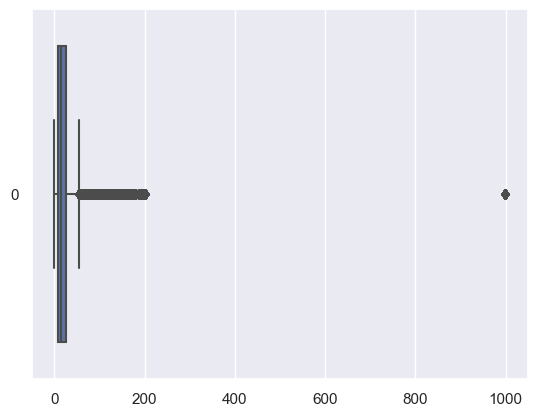

In [8]:
sb.boxplot(data = age, orient = "h")

### Based on our observation of the dataset, building's with the age value of 999 are presumably buildings of which they had no indication or information of when it was built. Another way to perceive why they would do this would be that the building is a historical building that had existed a century ago. Since this outlier will heavily affect our analysis by providing a skewed result and is not relevant to our analysis, since they are extremely old buildings, we will drop these buildings from our dataset.

In [9]:
eq_data_clean.drop(eq_data_clean[eq_data_clean['age_building'] >= 999].index, inplace = True)

In [10]:
#Find the mode of values
eq_data_clean.mode()

,age_building,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,15,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,0,1,0,0,0,0,0,0,0,0,0,Grade 5


<AxesSubplot:>

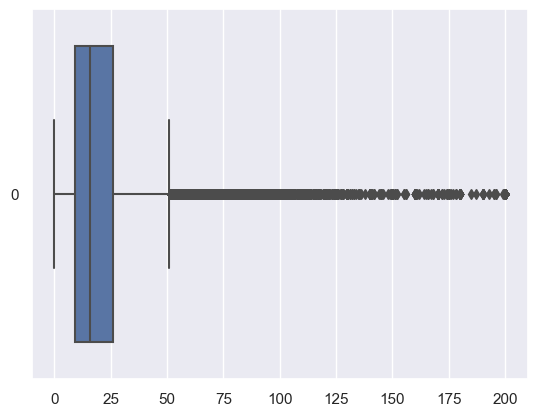

In [11]:
sb.boxplot(data = eq_data_clean['age_building'], orient = "h")

In [12]:
#Replace NA values with Mode values
eq_data_clean["damage_grade"].fillna(value = "Grade 5", inplace = True)
#eq_data_clean["technical_solution_proposed"].fillna(value = "Reconstruction", inplace = True)
#eq_data_clean["position"].fillna(value = "Not attached", inplace = True)
#eq_data_clean["plan_configuration"].fillna(value = "Rectangular", inplace = True)

In [13]:
eq_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758961 entries, 0 to 762105
Data columns (total 18 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   age_building                            758961 non-null  int64 
 1   land_surface_condition                  758961 non-null  object
 2   foundation_type                         758961 non-null  object
 3   roof_type                               758961 non-null  object
 4   ground_floor_type                       758961 non-null  object
 5   other_floor_type                        758961 non-null  object
 6   has_superstructure_adobe_mud            758961 non-null  int64 
 7   has_superstructure_mud_mortar_stone     758961 non-null  int64 
 8   has_superstructure_stone_flag           758961 non-null  int64 
 9   has_superstructure_cement_mortar_stone  758961 non-null  int64 
 10  has_superstructure_mud_mortar_brick     758961 non-null 

### Reducing dataset size

In [14]:
#check the numbers of rows
print("Data dims:", eq_data_clean.shape)

Data dims: (758961, 18)


In [15]:
#Cut down dataset to around 300k
eq_data_clean = eq_data_clean.sample(frac=0.4)
print("Data type:", type(eq_data_clean))
print("Data dims:", eq_data_clean.shape)

Data type: <class 'pandas.core.frame.DataFrame'>
Data dims: (303584, 18)


### Next step is to encode categorical data so that we can use them as numerical data with our machine learning models.

# Exploratory Data Analysis

Grade 5    110234
Grade 4     72873
Grade 3     54357
Grade 2     34706
Grade 1     31414
Name: damage_grade, dtype: int64


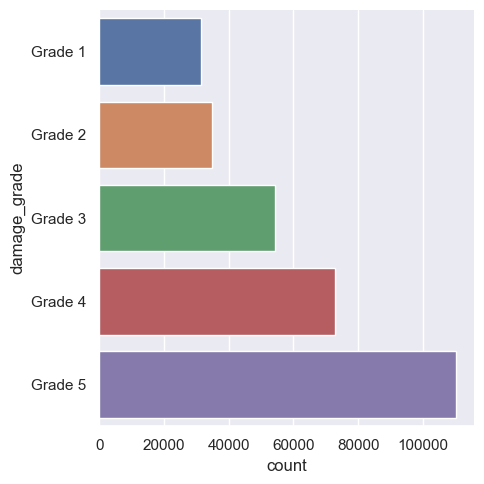

In [16]:
print(eq_data_clean["damage_grade"].value_counts())
rank=["Grade 1","Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(y = "damage_grade", data = eq_data_clean, kind = "count", order=rank)

<AxesSubplot:xlabel='age_building', ylabel='damage_grade'>

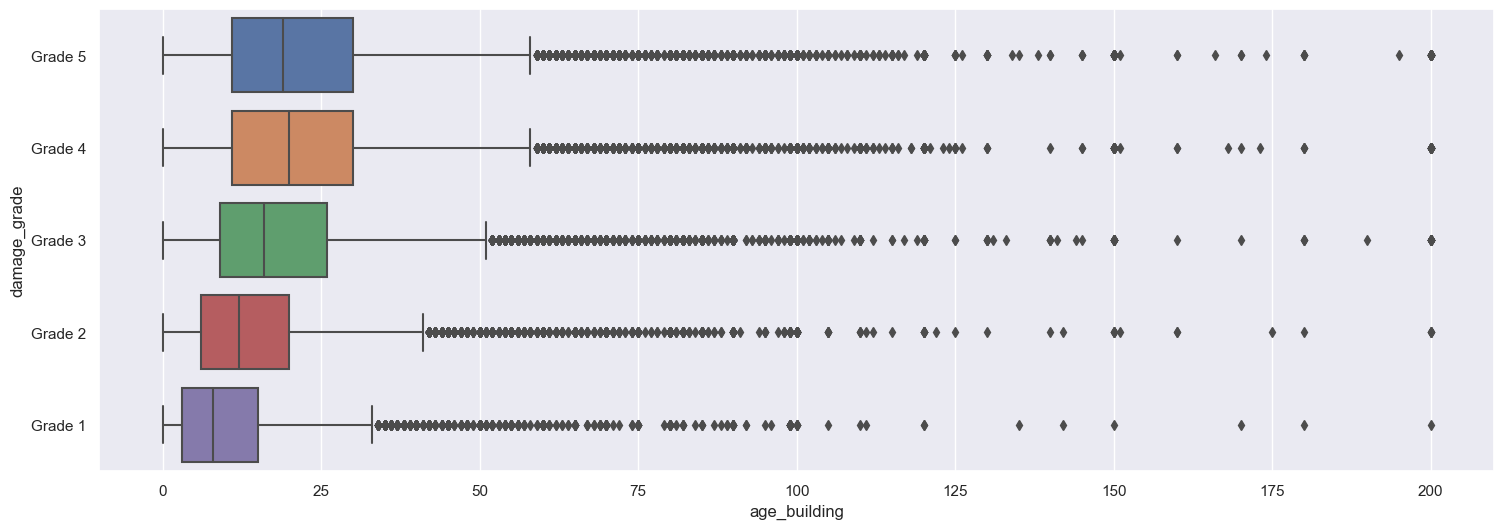

In [17]:
#boxplot of age_building against damage_grade
f = plt.figure(figsize=(18, 6))
ranks = eq_data_clean.groupby(by=["damage_grade"])["age_building"].median().iloc[::-1].index
sb.boxplot(x = "age_building", y = "damage_grade", data = eq_data_clean, orient = "h", order=ranks)

array([[<AxesSubplot:title={'center':'Grade 1'}>,
        <AxesSubplot:title={'center':'Grade 2'}>],
       [<AxesSubplot:title={'center':'Grade 3'}>,
        <AxesSubplot:title={'center':'Grade 4'}>],
       [<AxesSubplot:title={'center':'Grade 5'}>, <AxesSubplot:>]],
      dtype=object)

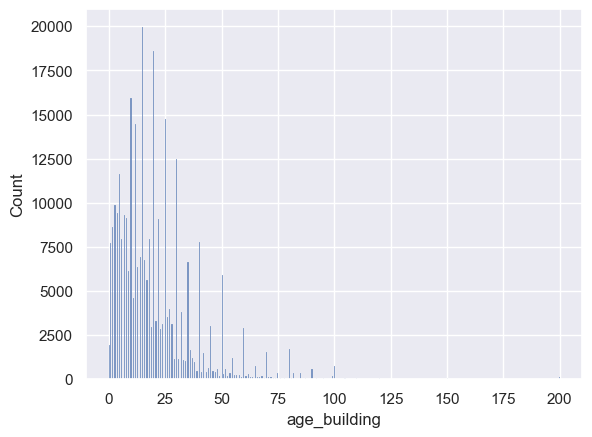

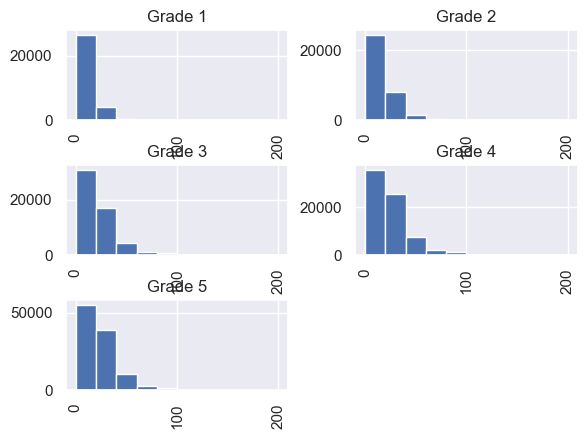

In [18]:
#histogram for age_building
sb.histplot(data = eq_data_clean["age_building"])
eq_data_clean.hist(by='damage_grade',column = 'age_building')

Mud mortar-Stone/Brick    250329
Bamboo/Timber              23013
Cement-Stone/Brick         15491
RC                         12927
Other                       1824
Name: foundation_type, dtype: int64
damage_grade  foundation_type       
Grade 1       Bamboo/Timber               6872
              Cement-Stone/Brick          4634
              Mud mortar-Stone/Brick     11665
              Other                        568
              RC                          7675
Grade 2       Bamboo/Timber               5252
              Cement-Stone/Brick          3479
              Mud mortar-Stone/Brick     22356
              Other                        181
              RC                          3438
Grade 3       Bamboo/Timber               5389
              Cement-Stone/Brick          2780
              Mud mortar-Stone/Brick     44668
              Other                        185
              RC                          1335
Grade 4       Bamboo/Timber               3342
          

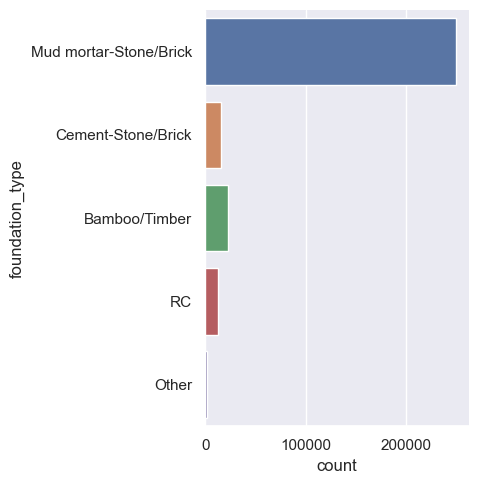

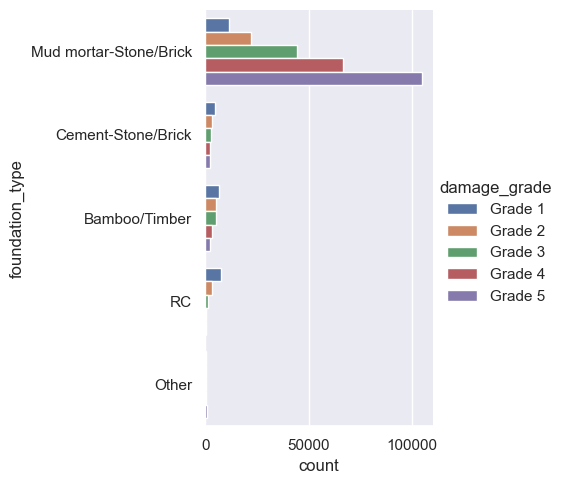

In [19]:
#bargraph for foundation_type
print(eq_data_clean["foundation_type"].value_counts())
sb.catplot(y = "foundation_type", data = eq_data_clean, kind = "count")

#bargraph of foundation_type against damage_grade
print(eq_data_clean[['damage_grade','foundation_type']].groupby(['damage_grade','foundation_type']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(y="foundation_type", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

Mud            246324
RC              29082
Brick/Stone     26357
Timber           1384
Other             437
Name: ground_floor_type, dtype: int64
damage_grade  ground_floor_type
Grade 1       Brick/Stone           2410
              Mud                  15145
              Other                  133
              RC                   13462
              Timber                 264
Grade 2       Brick/Stone           2613
              Mud                  23746
              Other                   83
              RC                    7994
              Timber                 270
Grade 3       Brick/Stone           4359
              Mud                  45337
              Other                   96
              RC                    4355
              Timber                 210
Grade 4       Brick/Stone           6658
              Mud                  63987
              Other                   70
              RC                    1885
              Timber                 273


(0.0, 100000.0)

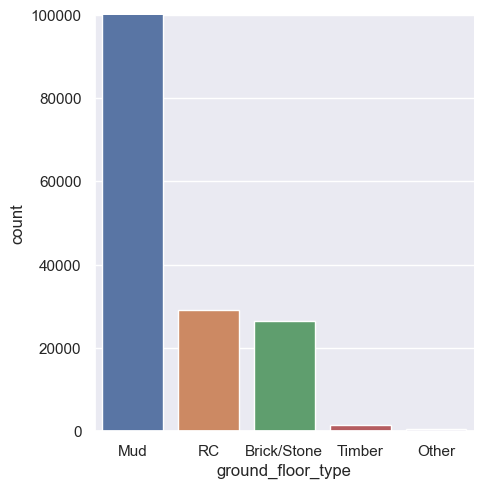

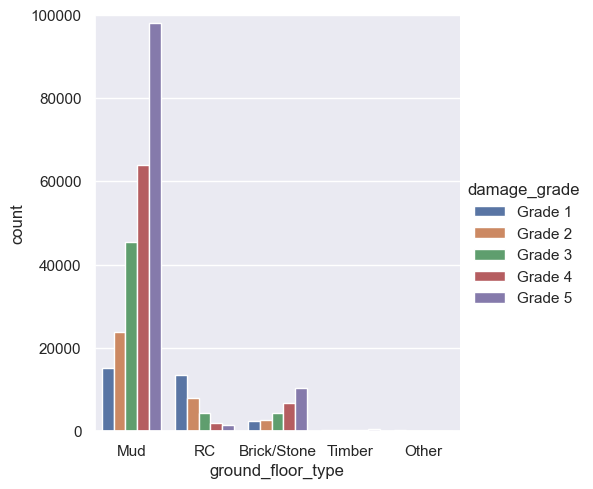

In [20]:
#bargraph for ground_floor_type
print(eq_data_clean["ground_floor_type"].value_counts())
plotgft=sb.catplot(x = "ground_floor_type", data = eq_data_clean, kind = "count")
plotgft.set(ylim=(0, 100000))

#bargraph of ground_floor_type against damage_grade
print(eq_data_clean[['damage_grade','ground_floor_type']].groupby(['damage_grade','ground_floor_type']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="ground_floor_type", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)
plt.ylim([0, 100000])

TImber/Bamboo-Mud    194083
Timber-Planck         49121
Not applicable        47345
RCC/RB/RBC            13035
Name: other_floor_type, dtype: int64
damage_grade  other_floor_type 
Grade 1       Not applicable       12221
              RCC/RB/RBC            6683
              TImber/Bamboo-Mud     7983
              Timber-Planck         4527
Grade 2       Not applicable        8508
              RCC/RB/RBC            3549
              TImber/Bamboo-Mud    17352
              Timber-Planck         5297
Grade 3       Not applicable        7102
              RCC/RB/RBC            1716
              TImber/Bamboo-Mud    37151
              Timber-Planck         8388
Grade 4       Not applicable        6135
              RCC/RB/RBC             625
              TImber/Bamboo-Mud    55502
              Timber-Planck        10611
Grade 5       Not applicable       13379
              RCC/RB/RBC             462
              TImber/Bamboo-Mud    76095
              Timber-Planck        20298

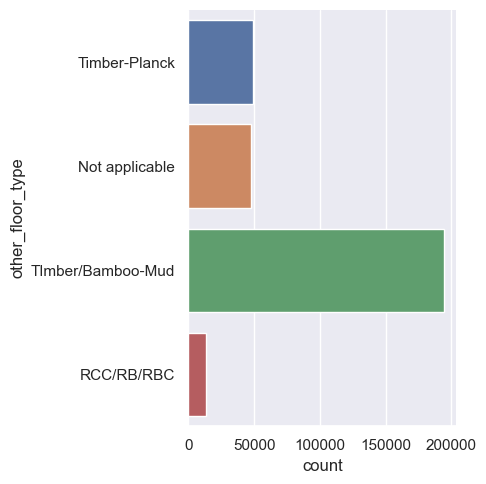

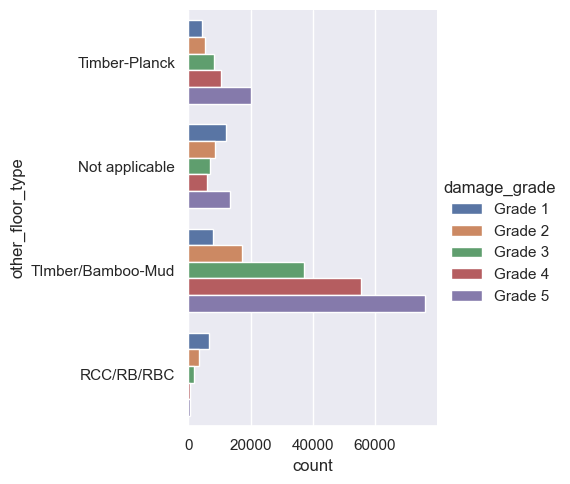

In [21]:
#bargraph for other_floor_type
print(eq_data_clean["other_floor_type"].value_counts())
sb.catplot(y = "other_floor_type", data = eq_data_clean, kind = "count")

#bargraph of other_floor_type against damage_grade
print(eq_data_clean[['damage_grade','other_floor_type']].groupby(['damage_grade','other_floor_type']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(y="other_floor_type", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

Bamboo/Timber-Light roof    200576
Bamboo/Timber-Heavy roof     85203
RCC/RB/RBC                   17805
Name: roof_type, dtype: int64
damage_grade  roof_type               
Grade 1       Bamboo/Timber-Heavy roof     5382
              Bamboo/Timber-Light roof    16295
              RCC/RB/RBC                   9737
Grade 2       Bamboo/Timber-Heavy roof     8848
              Bamboo/Timber-Light roof    20960
              RCC/RB/RBC                   4898
Grade 3       Bamboo/Timber-Heavy roof    16529
              Bamboo/Timber-Light roof    35703
              RCC/RB/RBC                   2125
Grade 4       Bamboo/Timber-Heavy roof    20587
              Bamboo/Timber-Light roof    51666
              RCC/RB/RBC                    620
Grade 5       Bamboo/Timber-Heavy roof    33857
              Bamboo/Timber-Light roof    75952
              RCC/RB/RBC                    425
dtype: int64


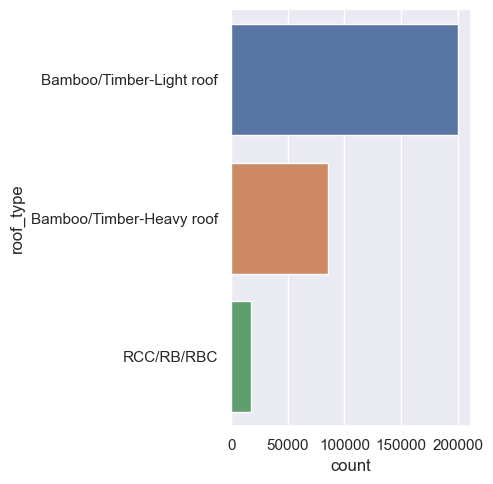

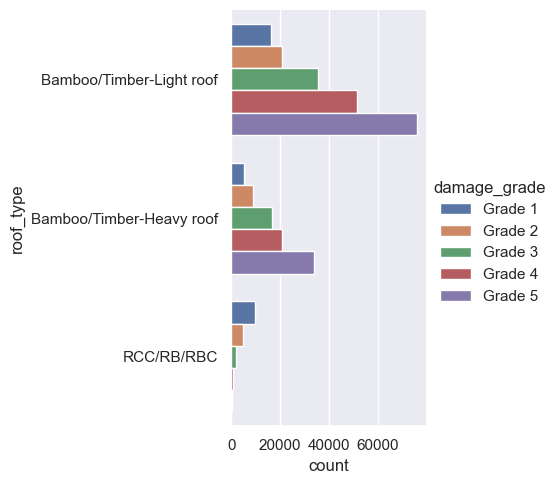

In [22]:
#bargraph for roof_type
print(eq_data_clean["roof_type"].value_counts())
sb.catplot(y = "roof_type", data = eq_data_clean, kind = "count")

#bargraph of roof_type against damage_grade
print(eq_data_clean[['damage_grade','roof_type']].groupby(['damage_grade','roof_type']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(y="roof_type", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

Flat              251486
Moderate slope     42287
Steep slope         9811
Name: land_surface_condition, dtype: int64
damage_grade  land_surface_condition
Grade 1       Flat                      27436
              Moderate slope             3233
              Steep slope                 745
Grade 2       Flat                      29061
              Moderate slope             4747
              Steep slope                 898
Grade 3       Flat                      44328
              Moderate slope             8223
              Steep slope                1806
Grade 4       Flat                      58904
              Moderate slope            11447
              Steep slope                2522
Grade 5       Flat                      91757
              Moderate slope            14637
              Steep slope                3840
dtype: int64


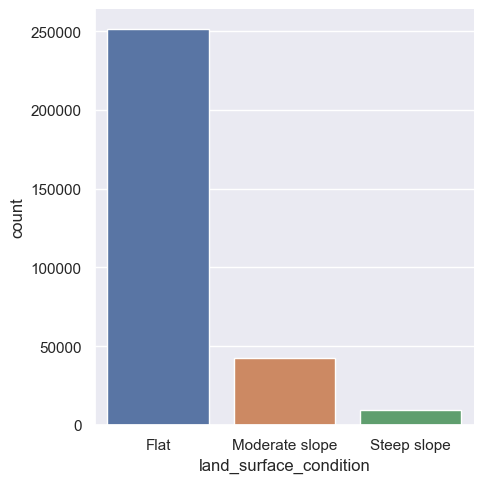

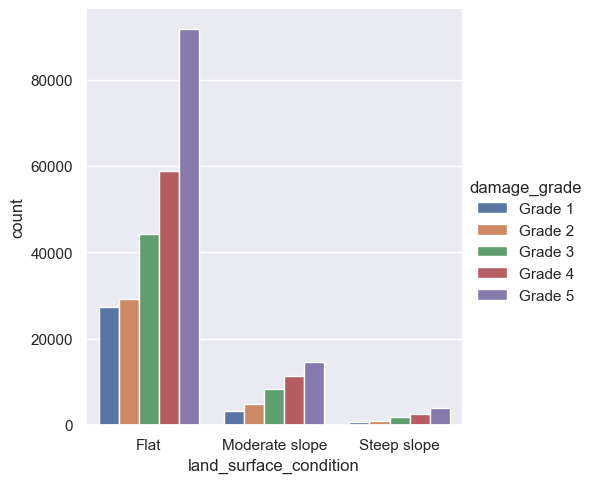

In [23]:
#bargraph for land_surface_condition
print(eq_data_clean["land_surface_condition"].value_counts())
sb.catplot(x = "land_surface_condition", data = eq_data_clean, kind = "count")

#bargraph of land_surface_condition against damage_grade
print(eq_data_clean[['damage_grade','land_surface_condition']].groupby(['damage_grade','land_surface_condition']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="land_surface_condition", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

damage_grade  has_superstructure_adobe_mud
Grade 1       0                                30861
              1                                  553
Grade 2       0                                33307
              1                                 1399
Grade 3       0                                51186
              1                                 3171
Grade 4       0                                68995
              1                                 3878
Grade 5       0                               106538
              1                                 3696
dtype: int64
damage_grade  has_superstructure_other
Grade 1       0                            30481
              1                              933
Grade 2       0                            34261
              1                              445
Grade 3       0                            53608
              1                              749
Grade 4       0                            72123
              1                 

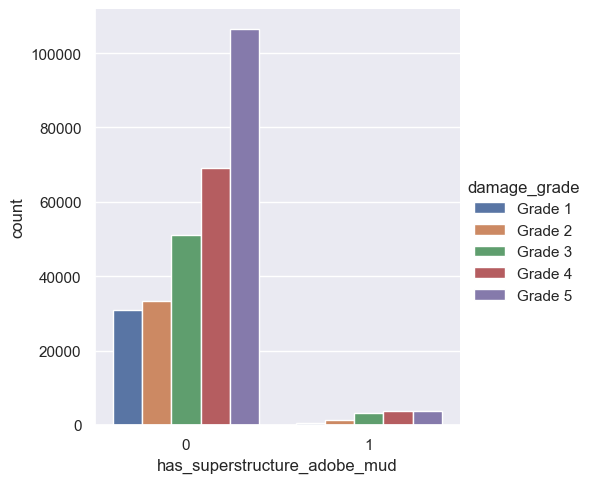

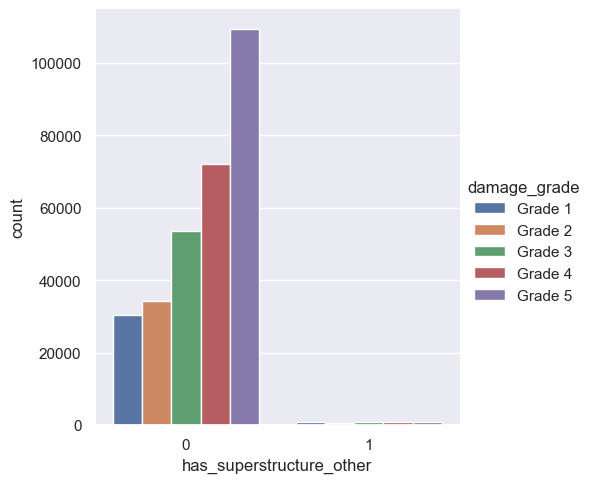

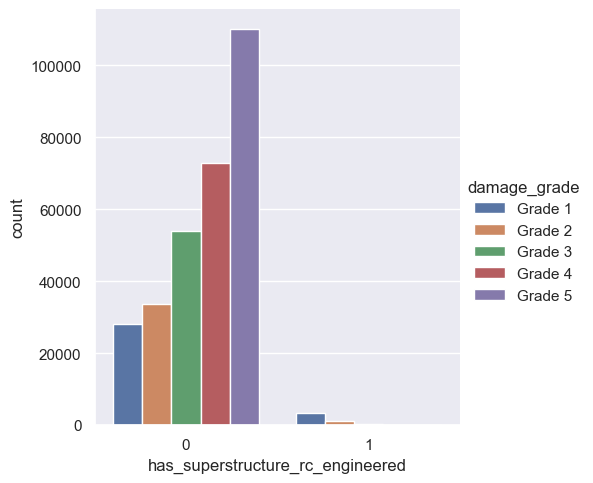

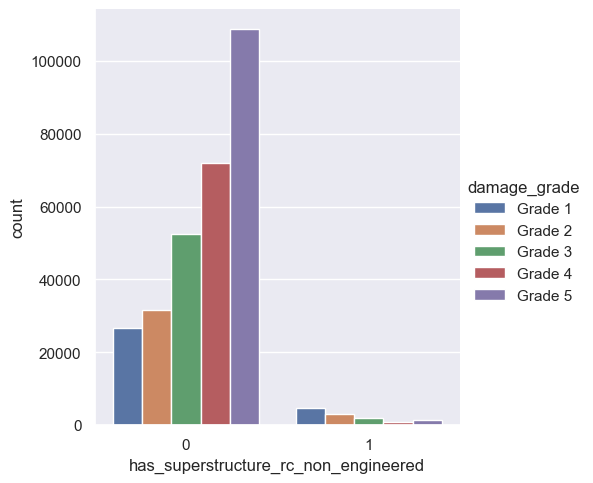

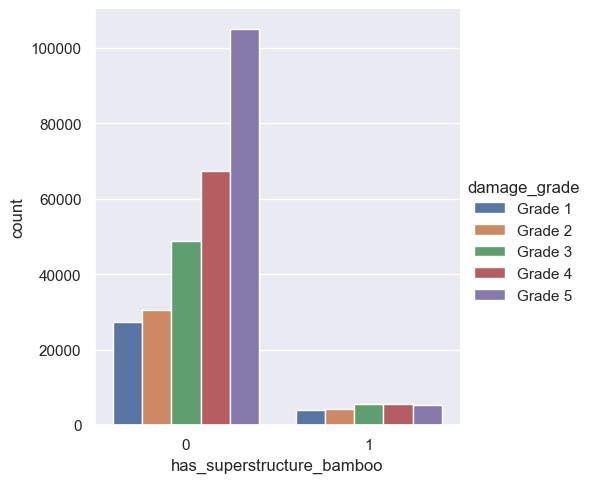

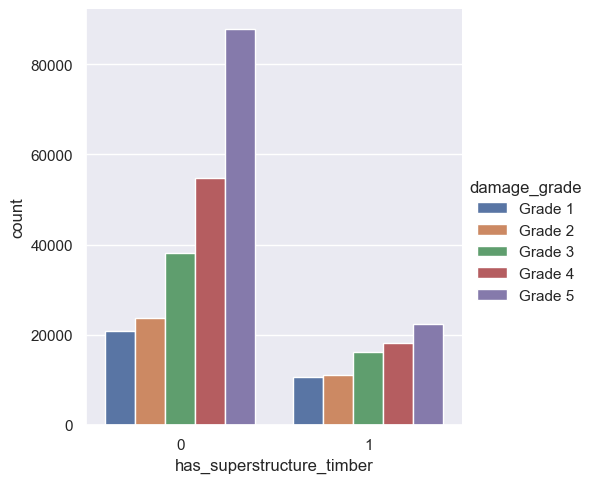

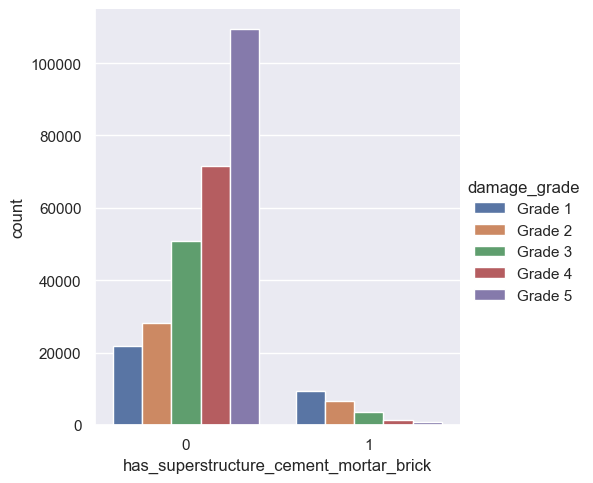

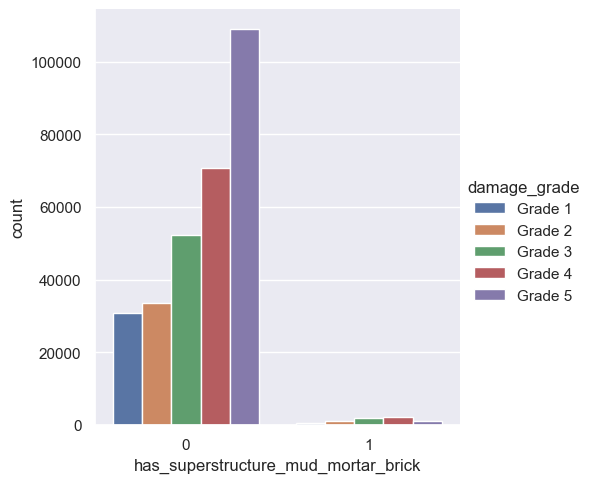

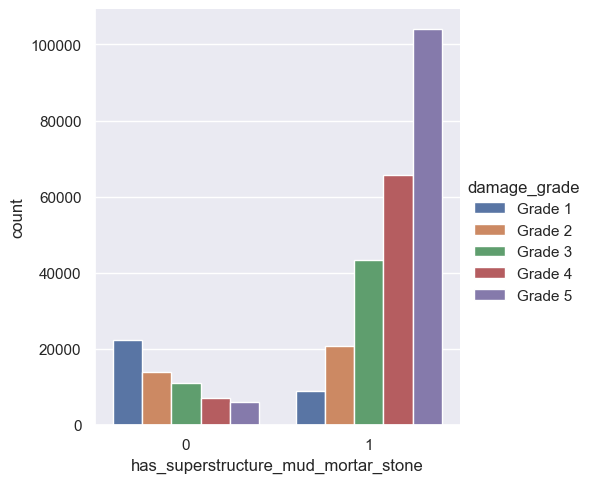

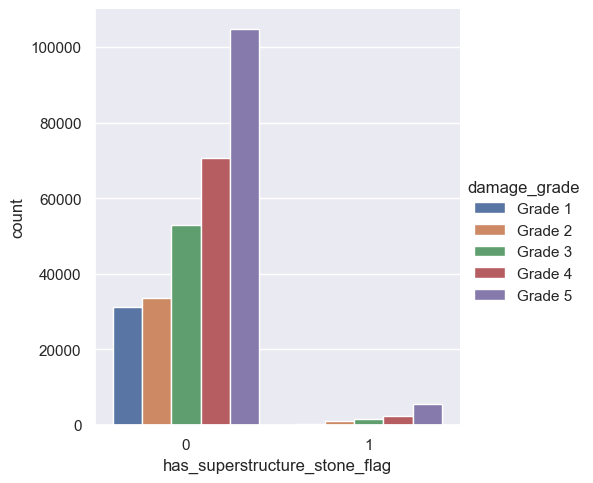

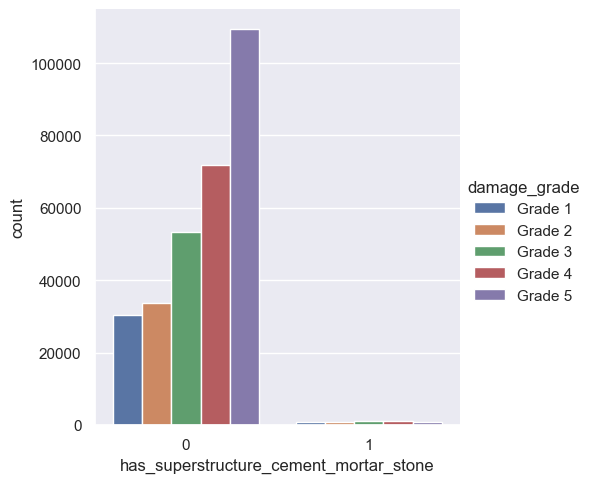

In [24]:
# 0 means No and 1 means Yes

#bargraph of has_superstructure_adobe_mud against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_adobe_mud']].groupby(['damage_grade','has_superstructure_adobe_mud']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_adobe_mud", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_other against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_other']].groupby(['damage_grade','has_superstructure_other']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_other", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_rc_engineered against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_rc_engineered']].groupby(['damage_grade','has_superstructure_rc_engineered']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_rc_engineered", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_rc_non_engineered against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_rc_non_engineered']].groupby(['damage_grade','has_superstructure_rc_non_engineered']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_rc_non_engineered", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_bamboo against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_bamboo']].groupby(['damage_grade','has_superstructure_bamboo']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_bamboo", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_timber against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_timber']].groupby(['damage_grade','has_superstructure_timber']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_timber", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_cement_mortar_brick against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_cement_mortar_brick']].groupby(['damage_grade','has_superstructure_cement_mortar_brick']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_cement_mortar_brick", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_mud_mortar_brick against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_mud_mortar_brick']].groupby(['damage_grade','has_superstructure_mud_mortar_brick']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_mud_mortar_brick", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_mud_mortar_stone against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_mud_mortar_stone']].groupby(['damage_grade','has_superstructure_mud_mortar_stone']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_mud_mortar_stone", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_stone_flag against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_stone_flag']].groupby(['damage_grade','has_superstructure_stone_flag']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_stone_flag", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

#bargraph of has_superstructure_cement_mortar_stone against damage_grade
print(eq_data_clean[['damage_grade','has_superstructure_cement_mortar_stone']].groupby(['damage_grade','has_superstructure_cement_mortar_stone']).size())
hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]
sb.catplot(x="has_superstructure_cement_mortar_stone", data=eq_data_clean, kind="count", hue="damage_grade", hue_order=hue_order)

In [25]:
damage_to_type = pd.DataFrame(eq_data_clean[['foundation_type', 'ground_floor_type', 'other_floor_type', 'roof_type', 'land_surface_condition', 'damage_grade']])
damage_to_type.describe()

,foundation_type,ground_floor_type,other_floor_type,roof_type,land_surface_condition,damage_grade
count,303584,303584,303584,303584,303584,303584
unique,5,5,4,3,3,5
top,Mud mortar-Stone/Brick,Mud,TImber/Bamboo-Mud,Bamboo/Timber-Light roof,Flat,Grade 5
freq,250329,246324,194083,200576,251486,110234


In [26]:
damage_to_superstructure = pd.DataFrame(eq_data_clean[['has_superstructure_adobe_mud', 'has_superstructure_other', 'has_superstructure_rc_engineered', 'has_superstructure_rc_non_engineered', 'has_superstructure_bamboo', 'has_superstructure_timber', 'has_superstructure_cement_mortar_brick', 'has_superstructure_mud_mortar_brick', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'damage_grade']])
damage_to_superstructure.describe()

,has_superstructure_adobe_mud,has_superstructure_other,has_superstructure_rc_engineered,has_superstructure_rc_non_engineered,has_superstructure_bamboo,has_superstructure_timber,has_superstructure_cement_mortar_brick,has_superstructure_mud_mortar_brick,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone
count,303584.000000,303584.000000,303584.000000,303584.000000,303584.000000,303584.000000,303584.000000,303584.000000,303584.000000,303584.000000,303584.000000
mean,0.041824,0.012234,0.016717,0.039857,0.080653,0.258584,0.071222,0.022966,0.800938,0.035002,0.015426
std,0.200186,0.109928,0.128209,0.195624,0.272302,0.437857,0.257197,0.149794,0.399295,0.183785,0.123239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Preparation for machine learning

### Before we start putting our data into machine learning models, our group wants to look at the significance of each material in predicting the damage severity to a building. We will start by looking at each material's correlation to damage grade.

In [27]:
damage_grade = eq_data_clean.filter(items=['damage_grade'])

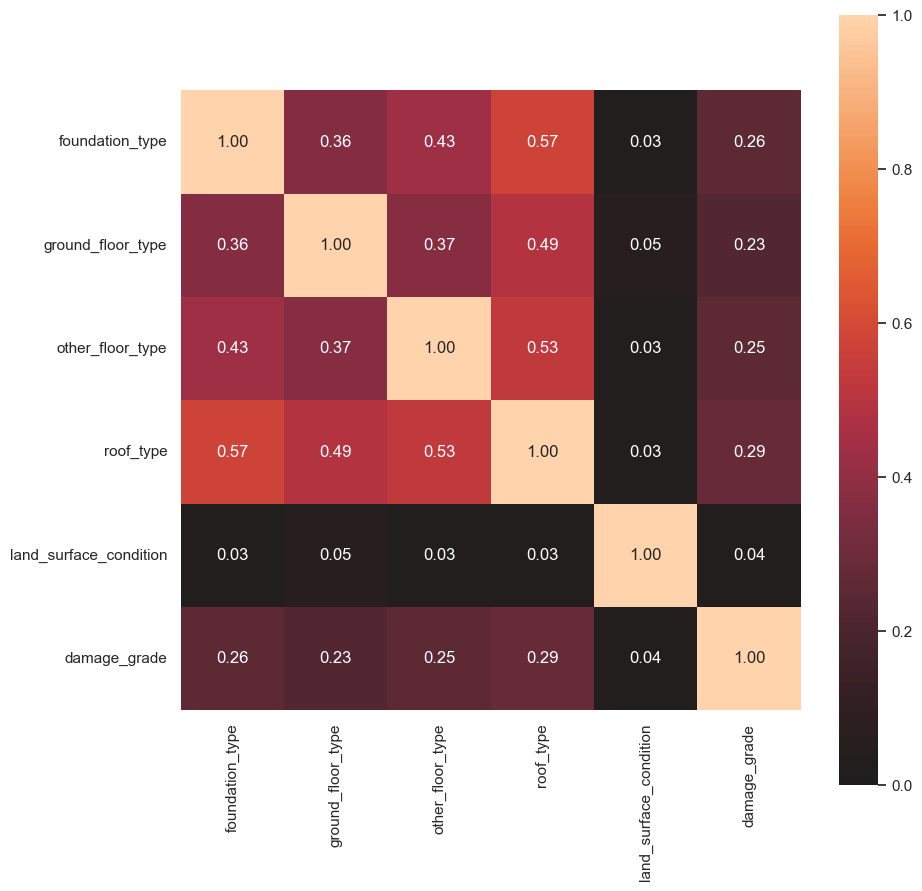

In [28]:
type_dmg_corr = associations(damage_to_type,figsize=(10,10))

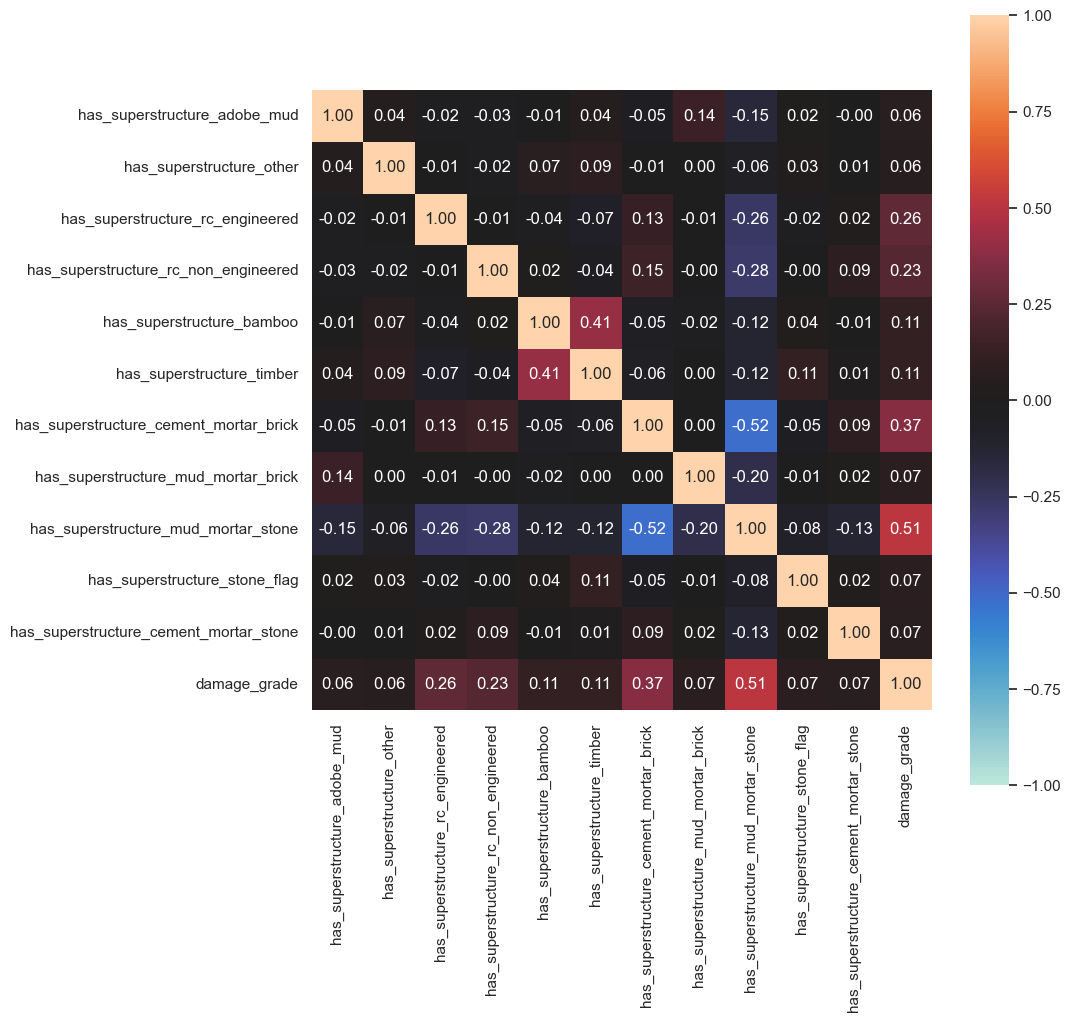

In [29]:
ss_dmg_corr = associations(damage_to_superstructure,figsize=(10,10))

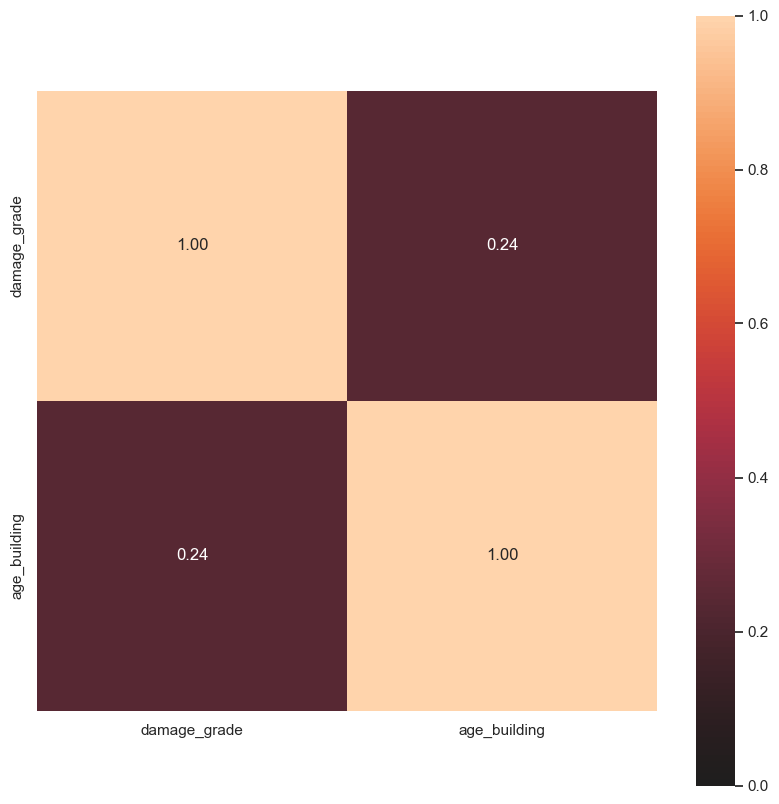

In [30]:
building_age = eq_data_clean.filter(items=['age_building'])
dmg_grade = eq_data_clean.filter(items=['damage_grade'])
damage_to_age = pd.concat([dmg_grade, building_age], axis=1)
dmg_age_corr = associations(damage_to_age,figsize=(10,10))

### Upon looking at the correlations, some variables have extremely weak relationship with damage grade. Thus, we will not be using them in our machine learning step. In addition, we still believe it is still necessary to investigate the variables we are interested in. 

### The following variables we are interested in investigating further and will be in our machine learning step:
##### - foundation_type
##### - ground_floor_type
##### - other_floor_type
##### - roof_type
##### - has_superstructure_rc_engineered
##### - has_superstructure_rc_non_engineered
##### - has_superstructure_bamboo
##### - has_superstructure_timber
##### - has_superstructure_cement_mortar_brick
##### - has_superstructure_mud_mortar_stone

### To handle our data easily, we have grouped them into two sets.

### Building Foundation set
##### - foundation_type
##### - roof_type
##### - ground_floor_type
##### - other_floor_type

### Superstructure Material set
##### - has_superstructure_rc_engineered
##### - has_superstructure_rc_non_engineered
##### - has_superstructure_bamboo
##### - has_superstructure_timber
##### - has_superstructure_cement_mortar_brick
##### - has_superstructure_mud_mortar_stone

### Before we dive into the Machine Learning step, we need to encode the categorical data using one-hot encoding so that they are usable with machine learning models.

In [31]:
##Prepare response data
dmg_grade = eq_data_clean['damage_grade']
bldg_age = eq_data_clean['age_building']

foundation_type = eq_data_clean['foundation_type']
gf_type = eq_data_clean['ground_floor_type']
otherFloor = eq_data_clean['other_floor_type']
roof_type = eq_data_clean['roof_type']

ss_rc_eng = eq_data_clean['has_superstructure_rc_engineered']
ss_rc_non_eng = eq_data_clean['has_superstructure_rc_non_engineered']
ss_bamboo = eq_data_clean['has_superstructure_bamboo']
ss_timber = eq_data_clean['has_superstructure_timber']
ss_mmstone = eq_data_clean['has_superstructure_mud_mortar_stone']
ss_cmbrick = eq_data_clean['has_superstructure_cement_mortar_brick']

##one-hot encode the categorical data to be used as predictor variables for logistic regression 
foundation_type_encoded = pd.get_dummies(eq_data_clean['foundation_type'])
gf_type_encoded = pd.get_dummies(eq_data_clean['ground_floor_type'])
otherFloor_type_encoded = pd.get_dummies(eq_data_clean['other_floor_type'])
roof_type_encoded = pd.get_dummies(eq_data_clean['roof_type'])

ss_rc_eng_encoded = pd.get_dummies(eq_data_clean['has_superstructure_rc_engineered'])
ss_rc_non_eng_encoded = pd.get_dummies(eq_data_clean['has_superstructure_rc_non_engineered'])
ss_bamboo_encoded = pd.get_dummies(eq_data_clean['has_superstructure_bamboo'])
ss_timber_encoded = pd.get_dummies(eq_data_clean['has_superstructure_timber'])
ss_mmstone_encoded = pd.get_dummies(eq_data_clean['has_superstructure_mud_mortar_stone'])
ss_cmbrick_encoded = pd.get_dummies(eq_data_clean['has_superstructure_cement_mortar_brick'])

### Machine Learning Step

### Our first step in machine learning step is to use Chi Square to rank the importance of each variable in predicting the damage grade.

In [32]:
merge = pd.concat([bldg_age, foundation_type, gf_type, otherFloor, roof_type], axis = 1)
merge_encode = pd.get_dummies(data=merge)
chi_scores = chi2(merge_encode, dmg_grade)

<AxesSubplot:>

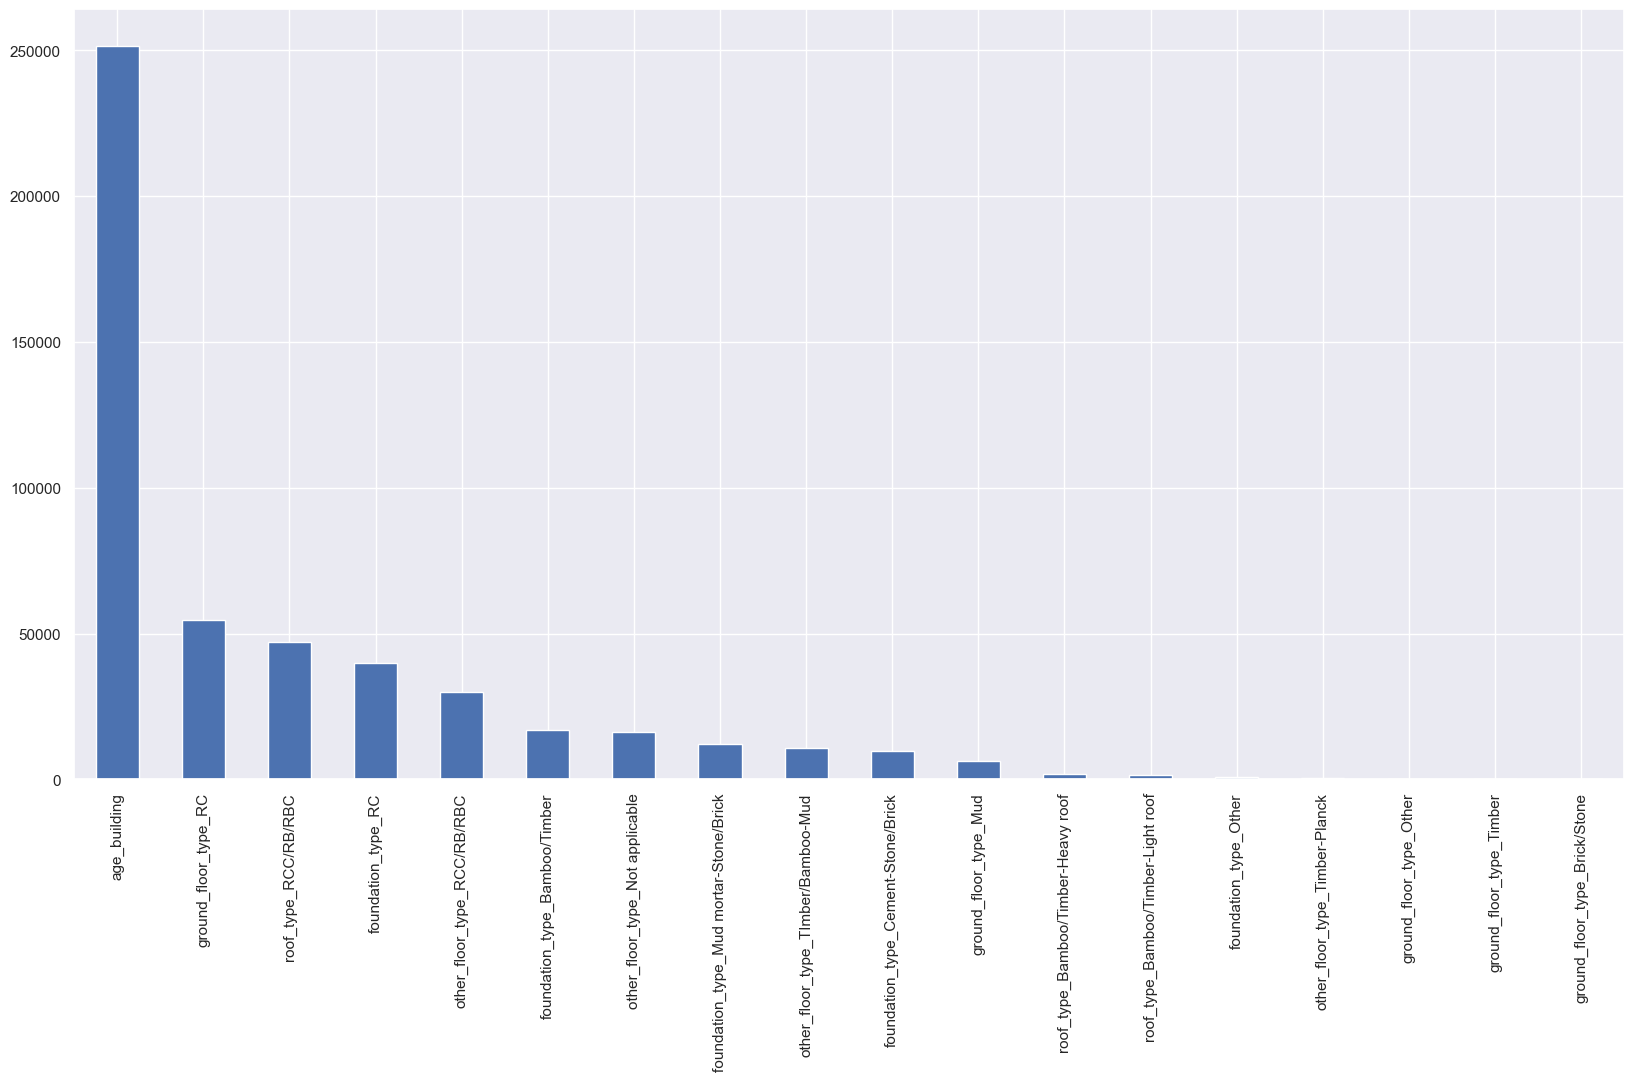

In [33]:
#the higher the chi value, the higher the importance
chi_values = pd.Series(chi_scores[0], index=merge_encode.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar(figsize=(20,10))

<AxesSubplot:>

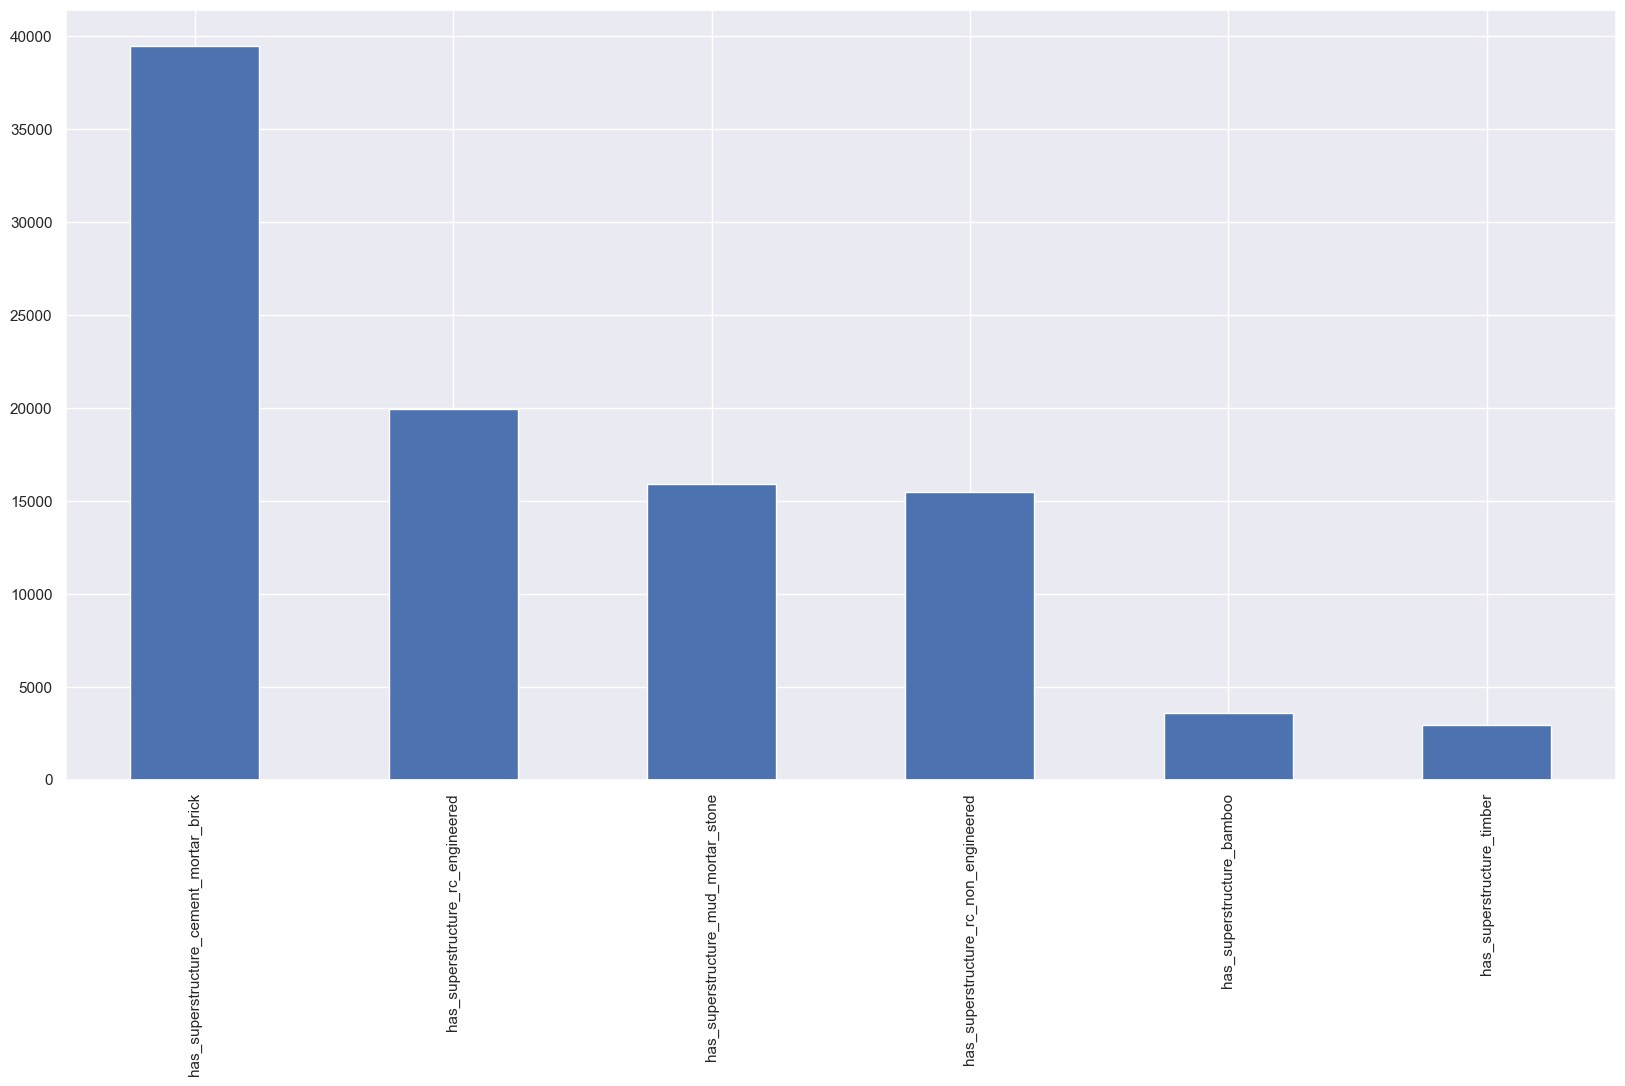

In [34]:
merge = pd.concat([ss_rc_eng, ss_rc_non_eng, ss_bamboo, ss_timber, ss_mmstone, ss_cmbrick], axis = 1)
merge_encode = pd.get_dummies(data=merge)
chi_scores = chi2(merge_encode, dmg_grade)

chi_values = pd.Series(chi_scores[0], index=merge_encode.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar(figsize=(20,10))

### Next, we will implement a Logistric Regression Model. This will help us further understand their relationship with damage grade of buildings and affirm their level of importance in contributing to damage grade.

### First, we will look at the superstructure variables and subsequently the variables related to a building's foundation.

## Superstructure Material Set

### Superstructure - Bamboo

In [35]:
train_pred, test_pred, train_resp, test_resp = train_test_split(ss_bamboo_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("Bamboo Superstructure Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))

Bamboo Superstructure Logistic Regression
------------------------------------------
Accuracy on the train set: 0.36
Accuracy on the test set: 0.36


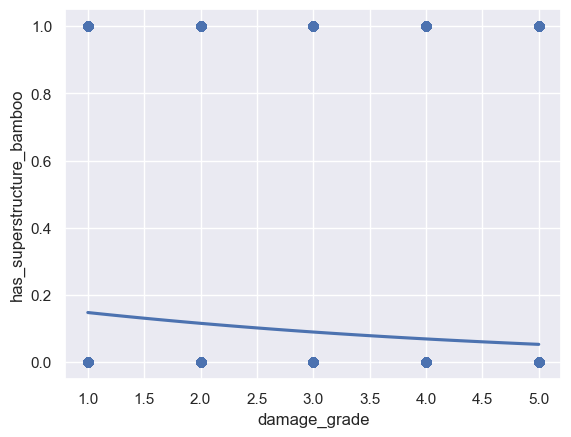

In [36]:
eq_data_clean["damage_grade"].replace(to_replace='Grade 1', value=1, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 2', value=2, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 3', value=3, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 4', value=4, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 5', value=5, inplace=True)

ss_bamboo = eq_data_clean['has_superstructure_bamboo']
merge = pd.concat([ss_bamboo, dmg_grade], axis=1)
sb.regplot(x=dmg_grade, y=ss_bamboo, data=merge, logistic=True, ci=None)

eq_data_clean["damage_grade"].replace(to_replace=1, value='Grade 1', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=2, value='Grade 2', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=3, value='Grade 3', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=4, value='Grade 4', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=5, value='Grade 5', inplace=True)

###  Superstructure - RC engineered

In [37]:
train_pred, test_pred, train_resp, test_resp = train_test_split(ss_rc_eng_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("RC Engineered Superstructure Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))

RC Engineered Superstructure Logistic Regression
------------------------------------------
Accuracy on the train set: 0.37
Accuracy on the test set: 0.37


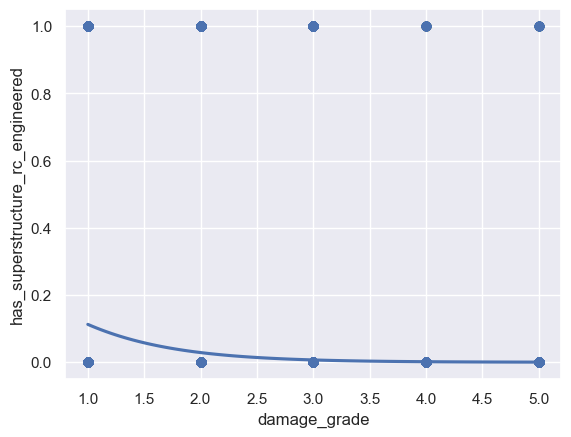

In [38]:
eq_data_clean["damage_grade"].replace(to_replace='Grade 1', value=1, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 2', value=2, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 3', value=3, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 4', value=4, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 5', value=5, inplace=True)

ss_rc_eng = eq_data_clean['has_superstructure_rc_engineered']
merge = pd.concat([ss_rc_eng, dmg_grade], axis=1)
sb.regplot(x=dmg_grade, y=ss_rc_eng, data=merge, logistic=True, ci=None)

eq_data_clean["damage_grade"].replace(to_replace=1, value='Grade 1', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=2, value='Grade 2', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=3, value='Grade 3', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=4, value='Grade 4', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=5, value='Grade 5', inplace=True)

### Superstructure - RC non engineered

In [39]:
train_pred, test_pred, train_resp, test_resp = train_test_split(ss_rc_non_eng_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("RC Non Engineered Superstructure Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))

RC Non Engineered Superstructure Logistic Regression
------------------------------------------
Accuracy on the train set: 0.37
Accuracy on the test set: 0.37


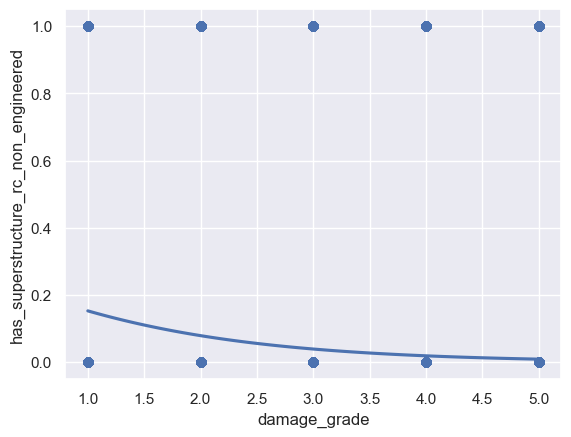

In [40]:
eq_data_clean["damage_grade"].replace(to_replace='Grade 1', value=1, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 2', value=2, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 3', value=3, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 4', value=4, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 5', value=5, inplace=True)

ss_rc_non_eng = eq_data_clean['has_superstructure_rc_non_engineered']
merge = pd.concat([ss_rc_non_eng, dmg_grade], axis=1)
sb.regplot(x=dmg_grade, y=ss_rc_non_eng, data=merge, logistic=True, ci=None)

eq_data_clean["damage_grade"].replace(to_replace=1, value='Grade 1', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=2, value='Grade 2', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=3, value='Grade 3', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=4, value='Grade 4', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=5, value='Grade 5', inplace=True)

### Superstructure - Timber

In [41]:
train_pred, test_pred, train_resp, test_resp = train_test_split(ss_timber_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("Timber Superstructure Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))

Timber Superstructure Logistic Regression
------------------------------------------
Accuracy on the train set: 0.36
Accuracy on the test set: 0.36


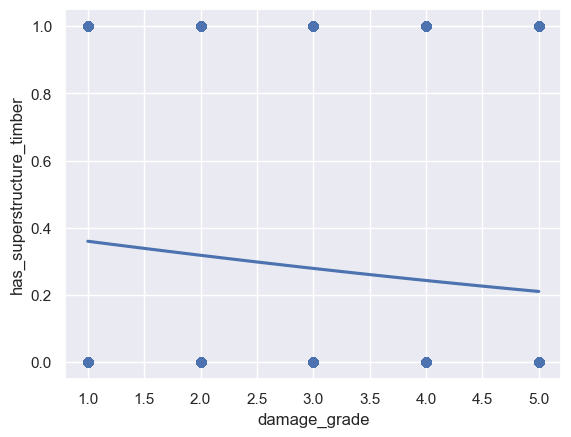

In [42]:
eq_data_clean["damage_grade"].replace(to_replace='Grade 1', value=1, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 2', value=2, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 3', value=3, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 4', value=4, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 5', value=5, inplace=True)

ss_timber = eq_data_clean['has_superstructure_timber']
merge = pd.concat([ss_timber, dmg_grade], axis=1)
sb.regplot(x=dmg_grade, y=ss_timber, data=merge, logistic=True, ci=None)

eq_data_clean["damage_grade"].replace(to_replace=1, value='Grade 1', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=2, value='Grade 2', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=3, value='Grade 3', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=4, value='Grade 4', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=5, value='Grade 5', inplace=True)

### Superstructure - Mud-Mortar Stone Brick

In [43]:
train_pred, test_pred, train_resp, test_resp = train_test_split(ss_mmstone_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("Mud-Mortar Stone Bricks Superstructure Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))

Mud-Mortar Stone Bricks Superstructure Logistic Regression
------------------------------------------
Accuracy on the train set: 0.42
Accuracy on the test set: 0.42


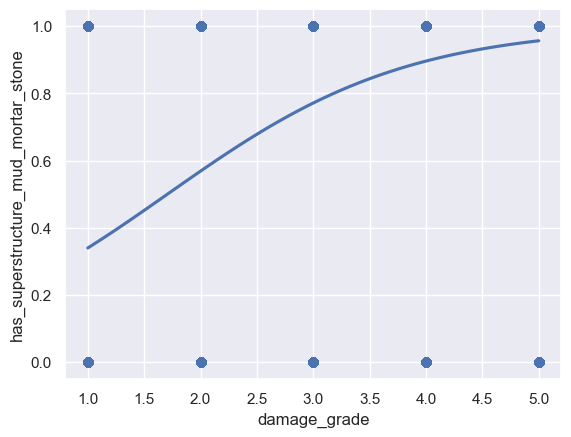

In [44]:
eq_data_clean["damage_grade"].replace(to_replace='Grade 1', value=1, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 2', value=2, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 3', value=3, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 4', value=4, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 5', value=5, inplace=True)

ss_mud_mortar_stone = eq_data_clean['has_superstructure_mud_mortar_stone']
merge = pd.concat([ss_mud_mortar_stone, dmg_grade], axis=1)
sb.regplot(x=dmg_grade, y=ss_mud_mortar_stone, data=merge, logistic=True, ci=None)

eq_data_clean["damage_grade"].replace(to_replace=1, value='Grade 1', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=2, value='Grade 2', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=3, value='Grade 3', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=4, value='Grade 4', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=5, value='Grade 5', inplace=True)

### Superstructure - Cement-Mortar Stone Brick

In [45]:
train_pred, test_pred, train_resp, test_resp = train_test_split(ss_cmbrick_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("Cement-Mortar Stone Bricks Superstructure Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))

Cement-Mortar Stone Bricks Superstructure Logistic Regression
------------------------------------------
Accuracy on the train set: 0.39
Accuracy on the test set: 0.39


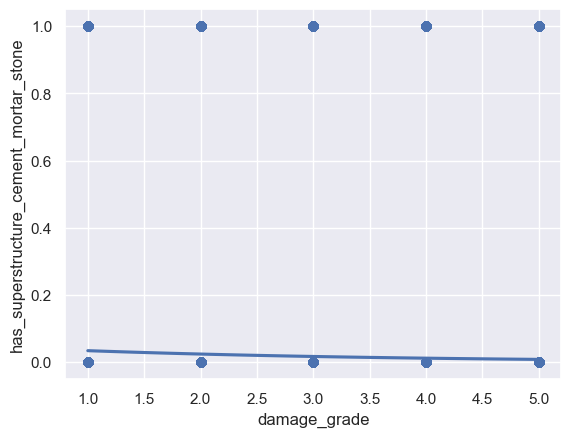

In [46]:
eq_data_clean["damage_grade"].replace(to_replace='Grade 1', value=1, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 2', value=2, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 3', value=3, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 4', value=4, inplace=True)
eq_data_clean["damage_grade"].replace(to_replace='Grade 5', value=5, inplace=True)

ss_cement_mortar_stone = eq_data_clean['has_superstructure_cement_mortar_stone']
merge = pd.concat([ss_cement_mortar_stone, dmg_grade], axis=1)
sb.regplot(x=dmg_grade, y=ss_cement_mortar_stone, data=merge, logistic=True, ci=None)

eq_data_clean["damage_grade"].replace(to_replace=1, value='Grade 1', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=2, value='Grade 2', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=3, value='Grade 3', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=4, value='Grade 4', inplace=True)
eq_data_clean["damage_grade"].replace(to_replace=5, value='Grade 5', inplace=True)

### Age Building

In [47]:
age_building_encoded = pd.get_dummies(eq_data_clean['age_building'])
train_pred, test_pred, train_resp, test_resp = train_test_split(age_building_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()
warnings.simplefilter("ignore")
logReg.fit(train_pred, train_resp)
print("Age Building Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))



Age Building Logistic Regression
------------------------------------------
Accuracy on the train set: 0.37
Accuracy on the test set: 0.37


## Building Foundation Set

### Foundation Type

In [48]:
train_pred, test_pred, train_resp, test_resp = train_test_split(foundation_type_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("Foundation Type Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))

Foundation Type Logistic Regression
------------------------------------------
Accuracy on the train set: 0.41
Accuracy on the test set: 0.41


### Ground Floor Type

In [49]:
train_pred, test_pred, train_resp, test_resp = train_test_split(gf_type_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("Ground Floor Type Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))

Ground Floor Type Logistic Regression
------------------------------------------
Accuracy on the train set: 0.40
Accuracy on the test set: 0.40


### Other Floor Type

In [50]:
warnings.simplefilter("ignore")
train_pred, test_pred, train_resp, test_resp = train_test_split(roof_type_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("Other Floor Type Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))

Other Floor Type Logistic Regression
------------------------------------------
Accuracy on the train set: 0.39
Accuracy on the test set: 0.39


### Roof Type

In [51]:
warnings.simplefilter("ignore")
train_pred, test_pred, train_resp, test_resp = train_test_split(otherFloor_type_encoded,dmg_grade, test_size = 0.3, random_state = 42)
logReg = LogisticRegression()

logReg.fit(train_pred, train_resp)
print("Roof Floor Type Logistic Regression")
print("------------------------------------------")
train_acc = logReg.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_acc))

resp_predictor = logReg.predict(test_pred)
test_acc = accuracy_score(test_resp,resp_predictor)
print('Accuracy on the test set: {:.2f}'.format(test_acc))

Roof Floor Type Logistic Regression
------------------------------------------
Accuracy on the train set: 0.38
Accuracy on the test set: 0.38


### Second step, we will use Random Forest to check the use and accuracy of the values to predict damage grade. As seen above, the some superstructure variables have a higher level of importance than the remaining variables. So we will be investigating these values only.

### We will also match the foundation type, ground floor type, other floor type and roof type against damage grade.

## Buildings Superstructure

In [52]:
merge = pd.concat([ss_rc_eng, ss_rc_non_eng, ss_bamboo, ss_timber, ss_mmstone, ss_cmbrick], axis = 1)
train_pred, test_pred, train_resp, test_resp = train_test_split(merge,dmg_grade, test_size = 0.3, random_state = 42)
rf = RandomForestClassifier()
rf.fit(train_pred, train_resp)
predictor = rf.predict(test_pred)
accuracy = accuracy_score(test_resp, predictor)
print('Accuracy of Superstructure Random Forest: {:.2f}'.format(accuracy))

Accuracy of Superstructure Random Forest: 0.42


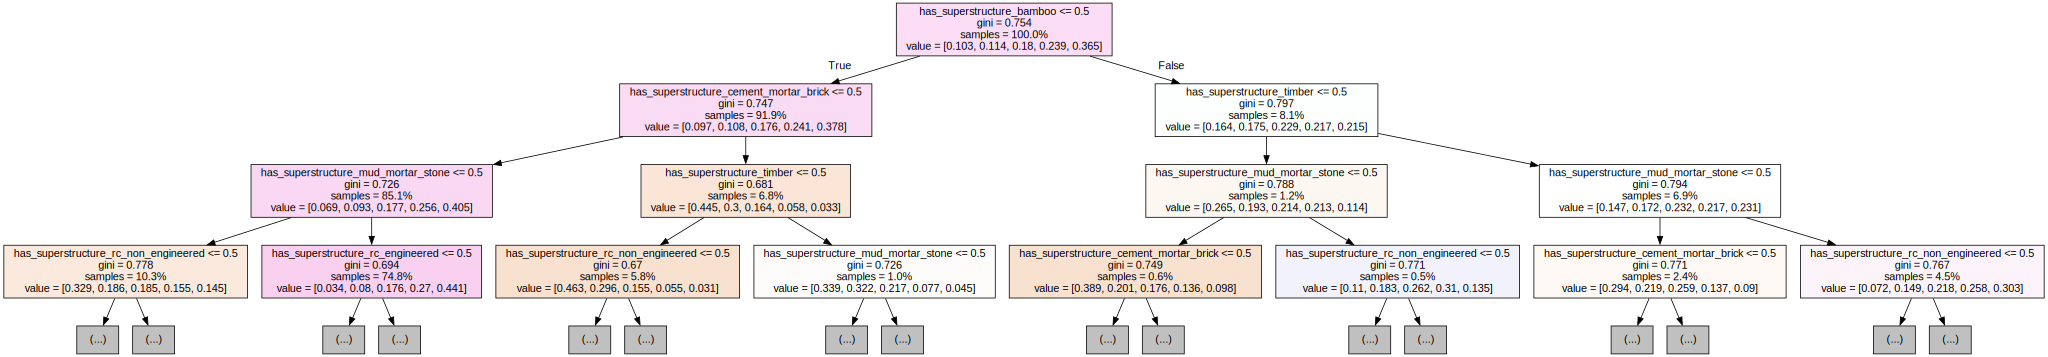

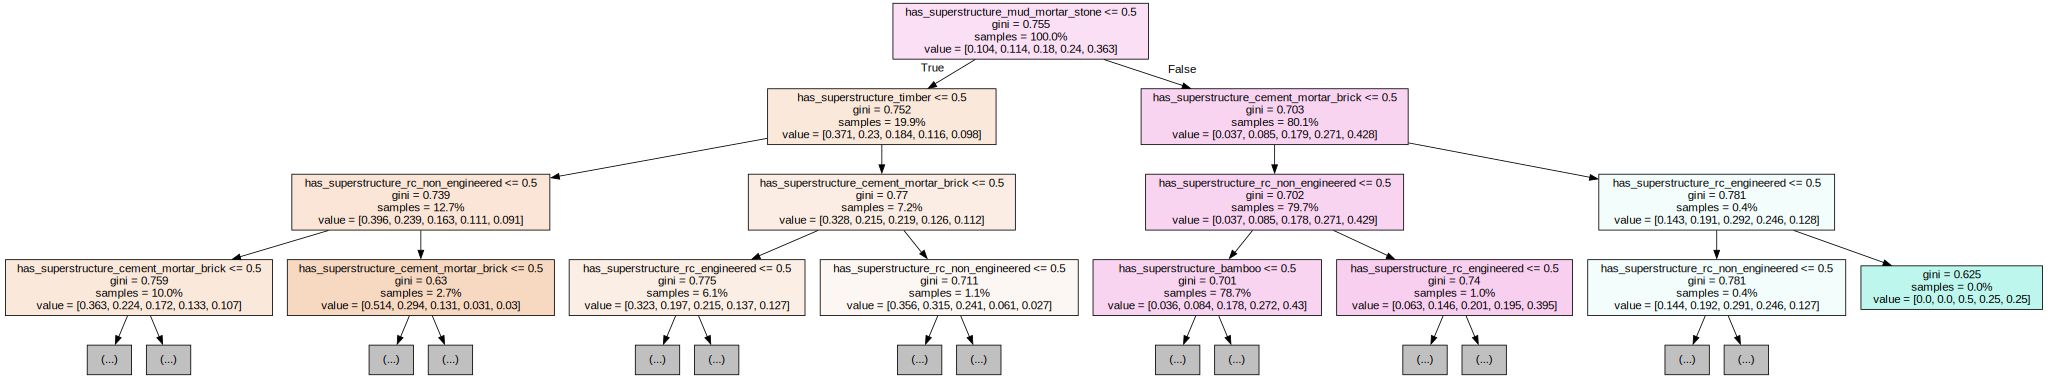

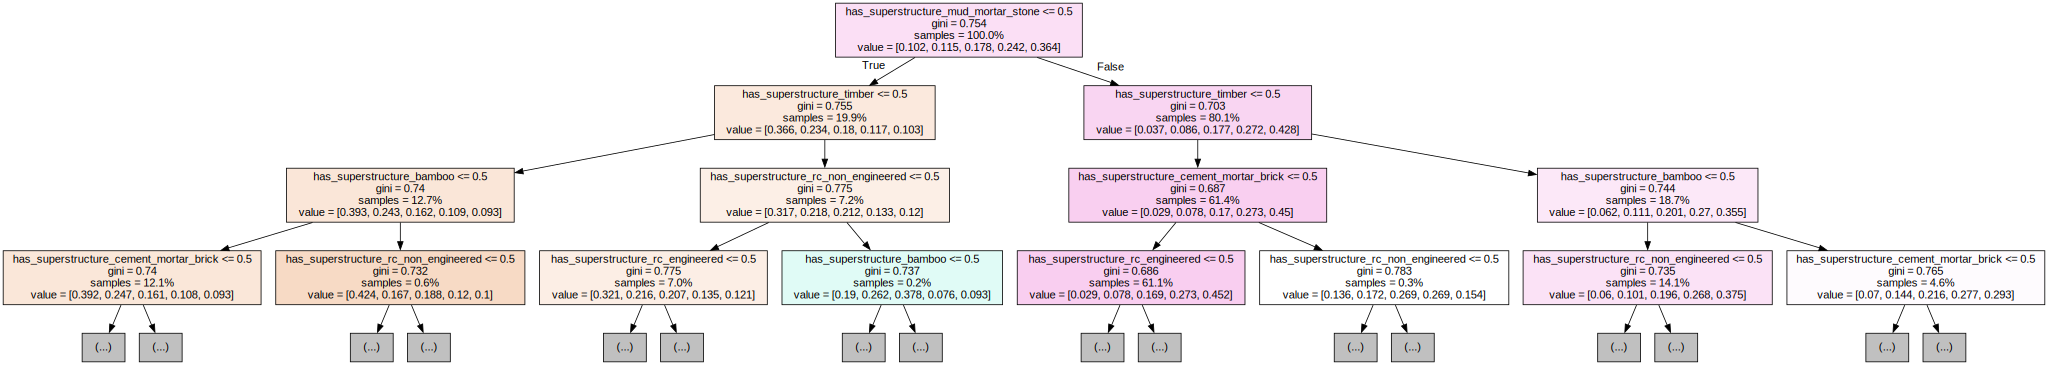

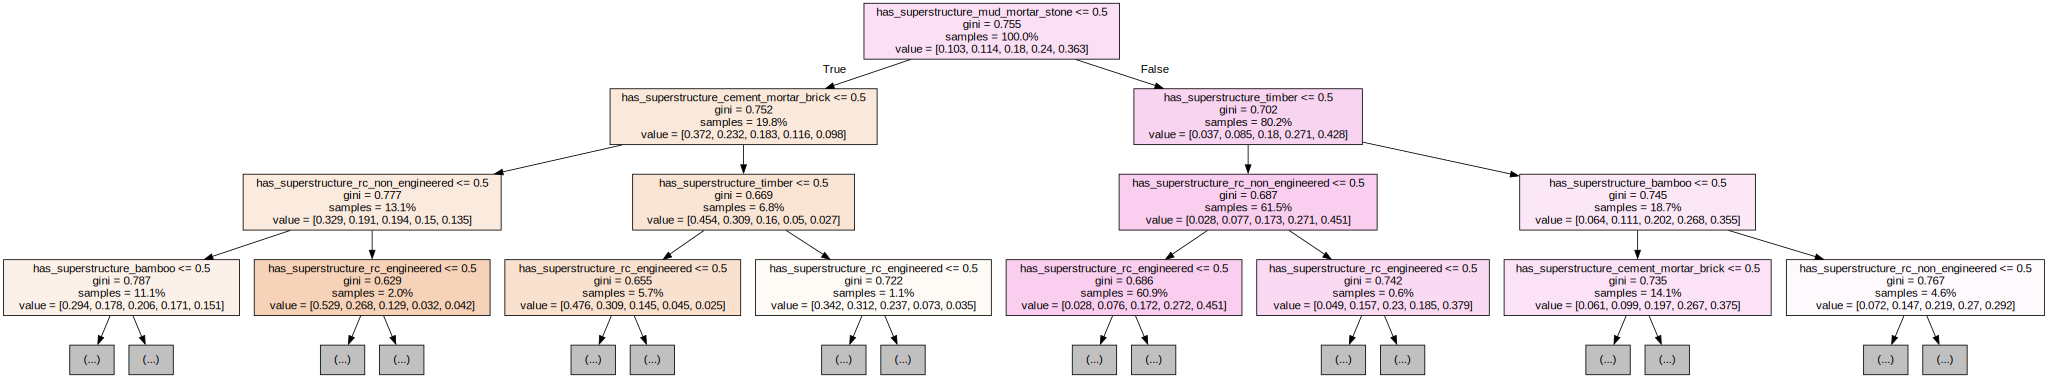

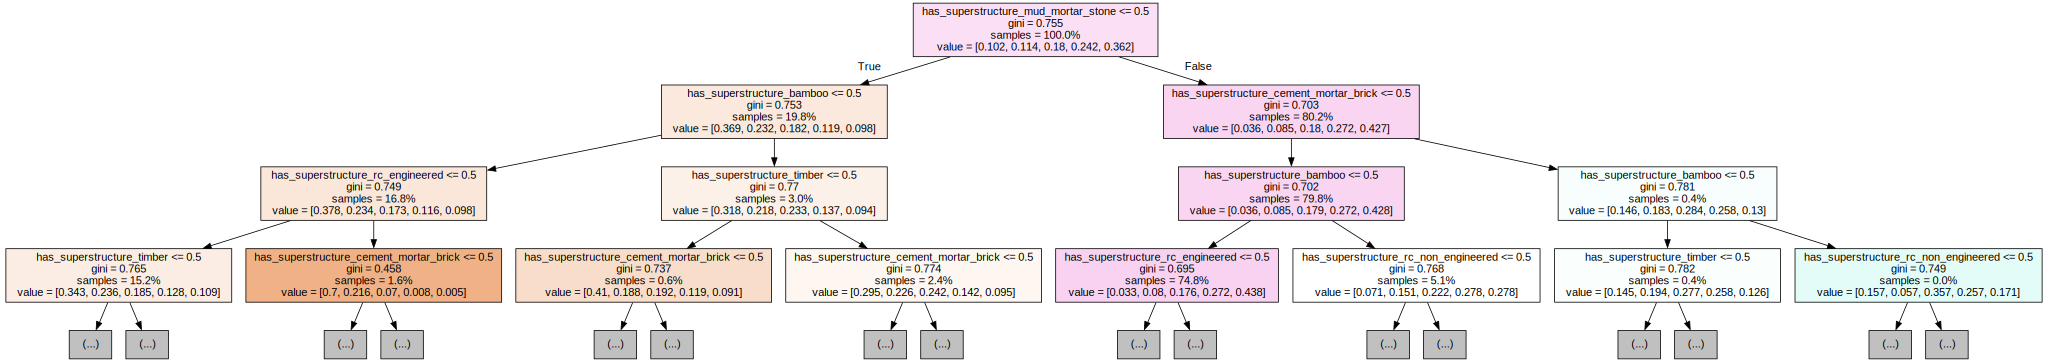

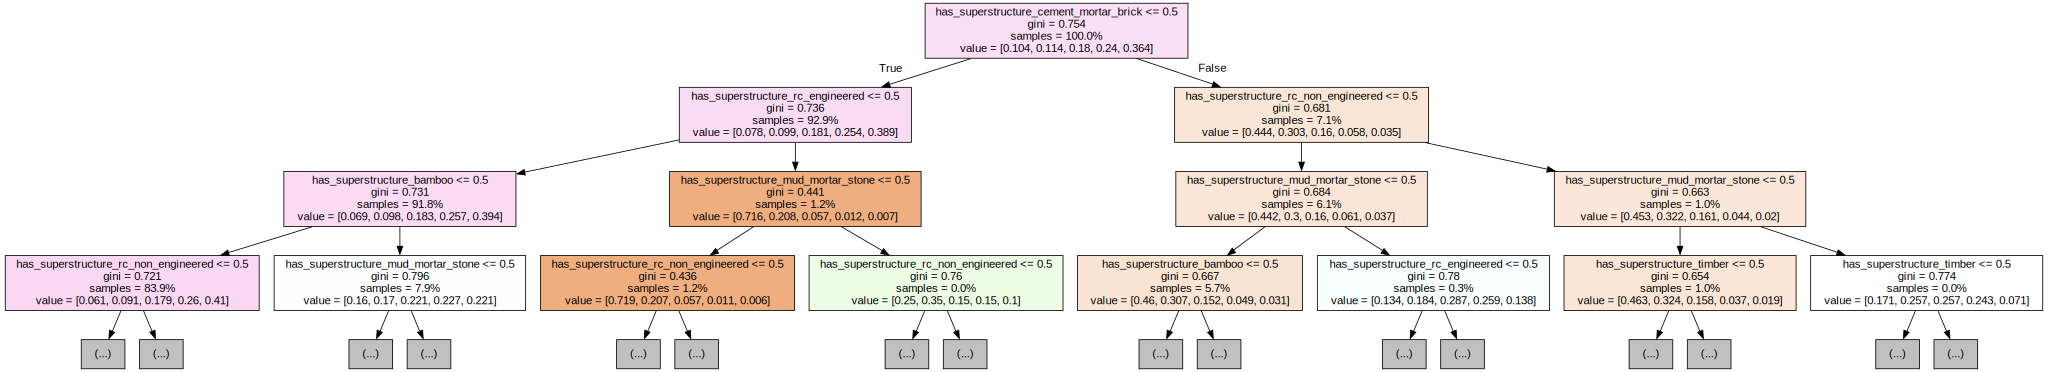

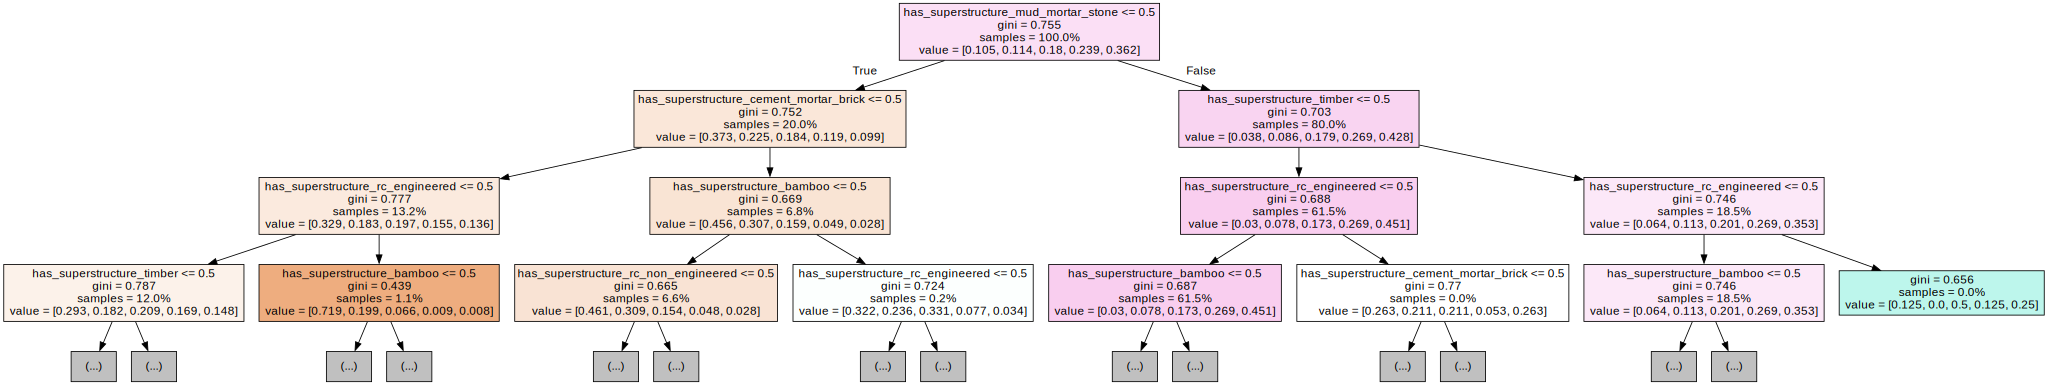

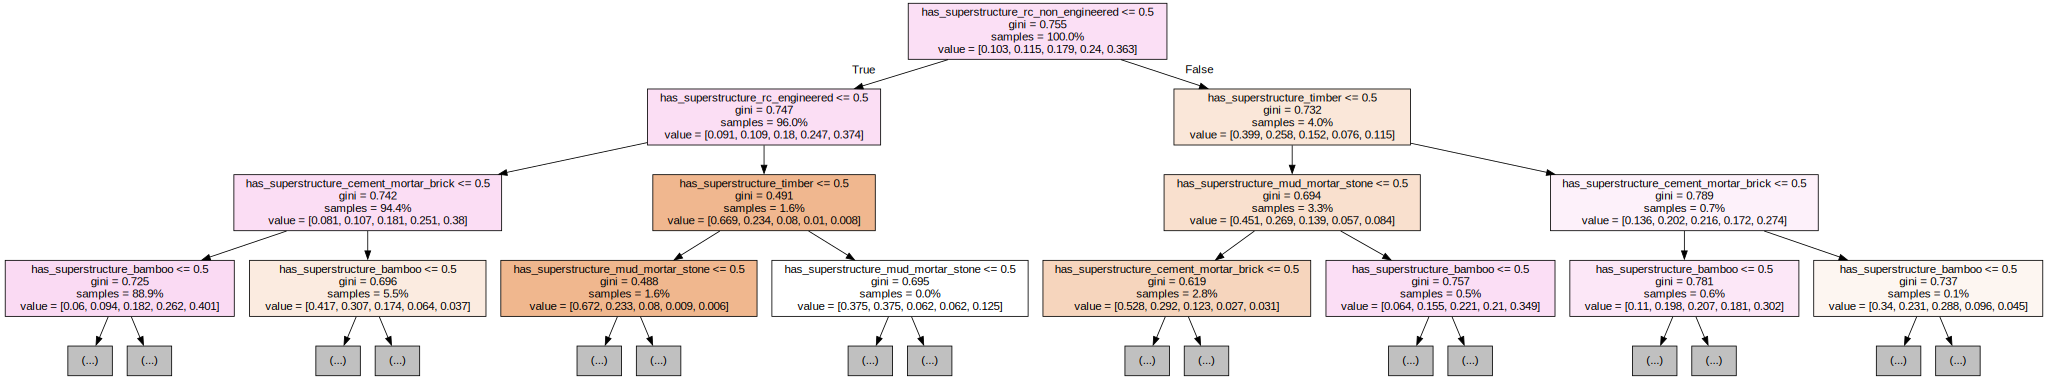

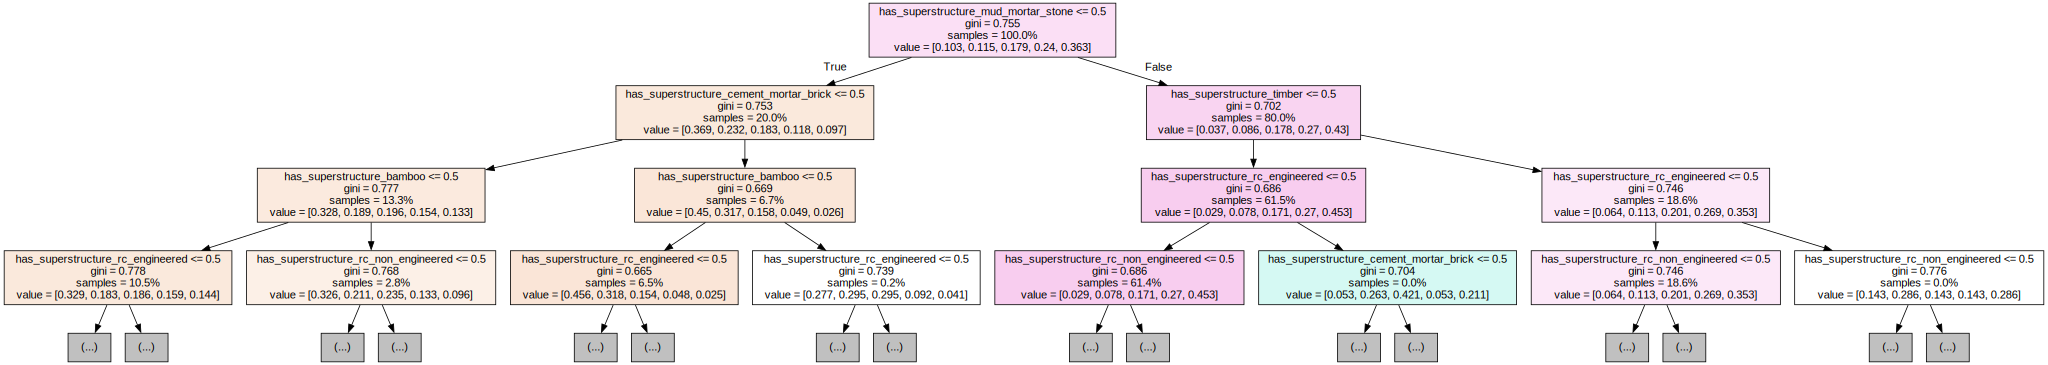

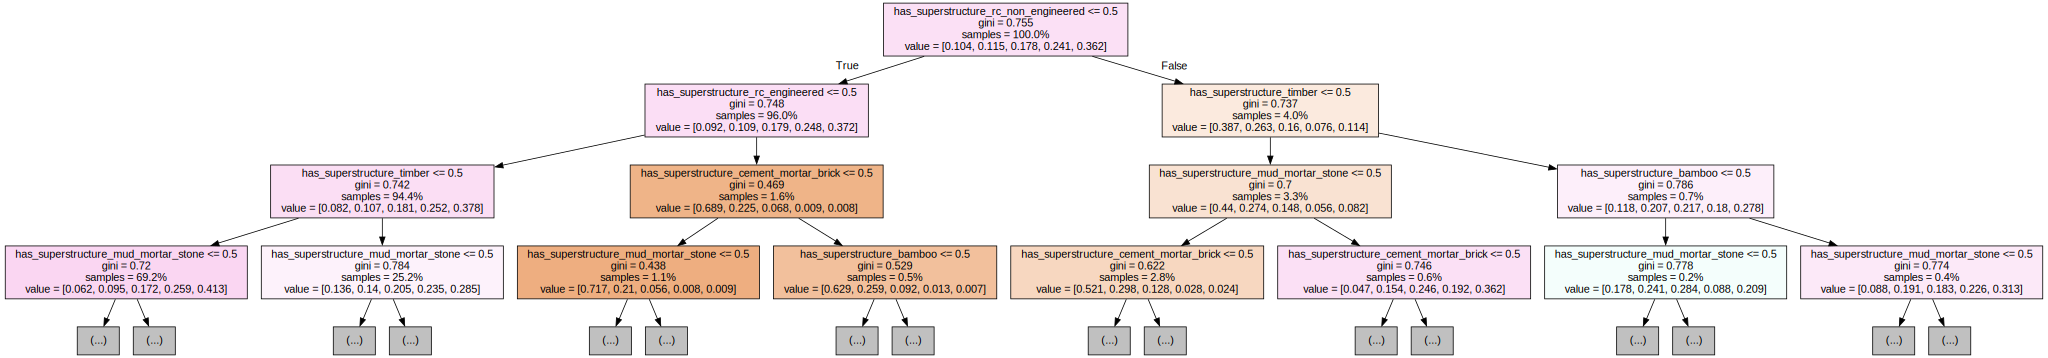

<Figure size 3000x3000 with 0 Axes>

In [53]:
f = plt.figure(figsize=(30,30))

for i in range(10):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=train_pred.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=True, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### From these 10 Random Forest trees, the most popular choice was the Cement-Mortar Brick. Secondly most popular was Reinforced Concrete (RC) Non Engineered. Lastly, the superstructure Timber was the runner up to the first two choices. 

### We can infer from these choices that the use of Cement-Mortar Brick and RC Non Engineered for superstructure are the main contributors in determining the expected damage grade of a building. Meanwhile, Timber is a mild contributor to damage grade. The surprising fact is that RC Non Engineered and Timber did not have a high Chi Square value, as seen above, yet it was a somewhat popular choice by the Random Forest model.


# Building's Foundation

In [54]:
merge = pd.concat([foundation_type_encoded, gf_type_encoded, otherFloor_type_encoded, roof_type_encoded], axis = 1)
train_pred, test_pred, train_resp, test_resp = train_test_split(merge,dmg_grade, test_size = 0.3, random_state = 42)
rf = RandomForestClassifier()
rf.fit(train_pred, train_resp)
predictor = rf.predict(test_pred)
accuracy = accuracy_score(test_resp, predictor)
print('Accuracy of Building Foundation Random Forest: {:.2f}'.format(accuracy))

Accuracy of Building Foundation Random Forest: 0.42


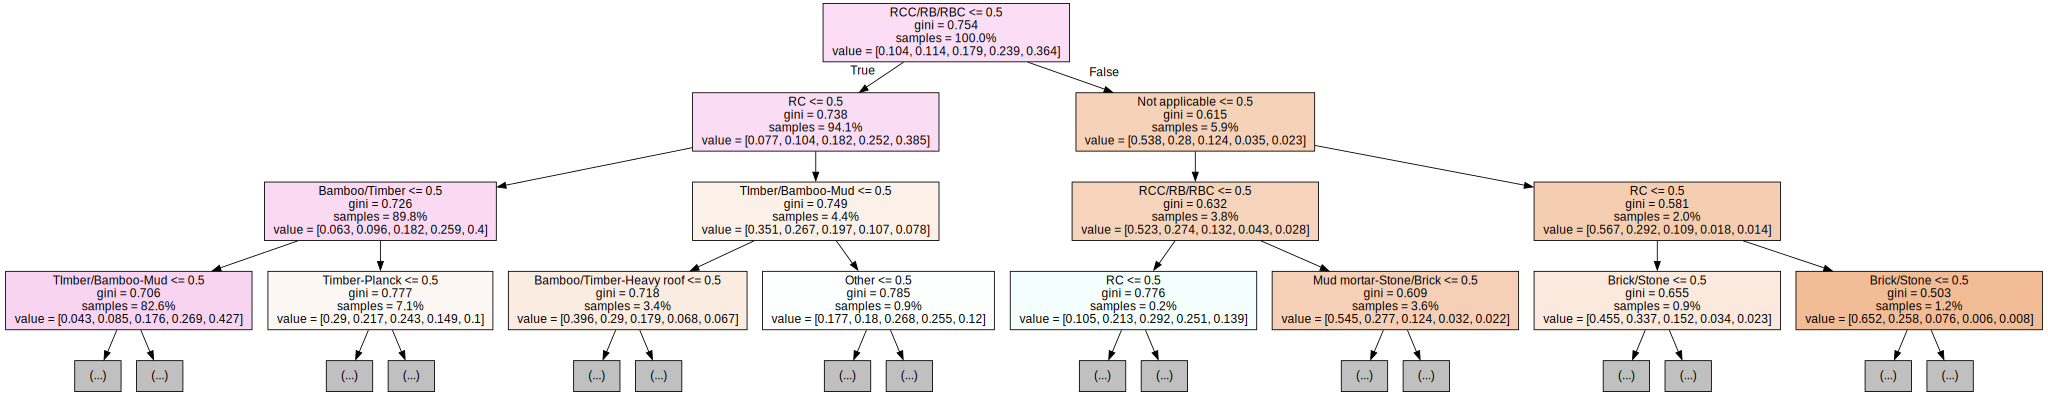

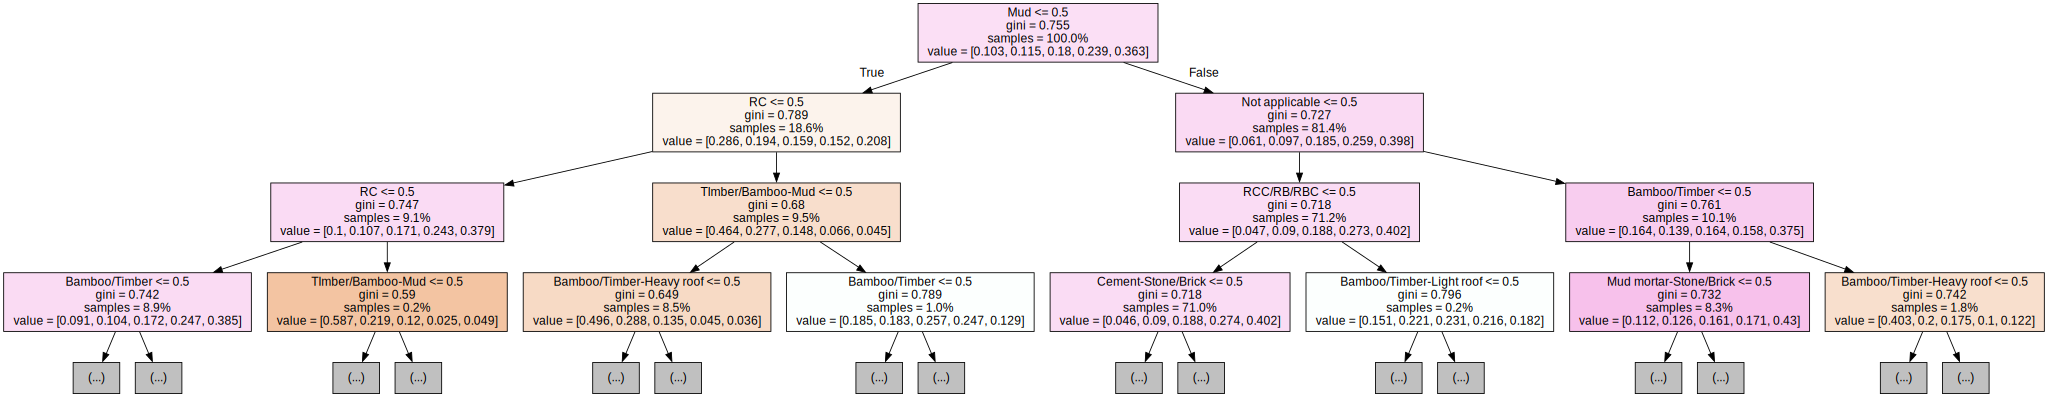

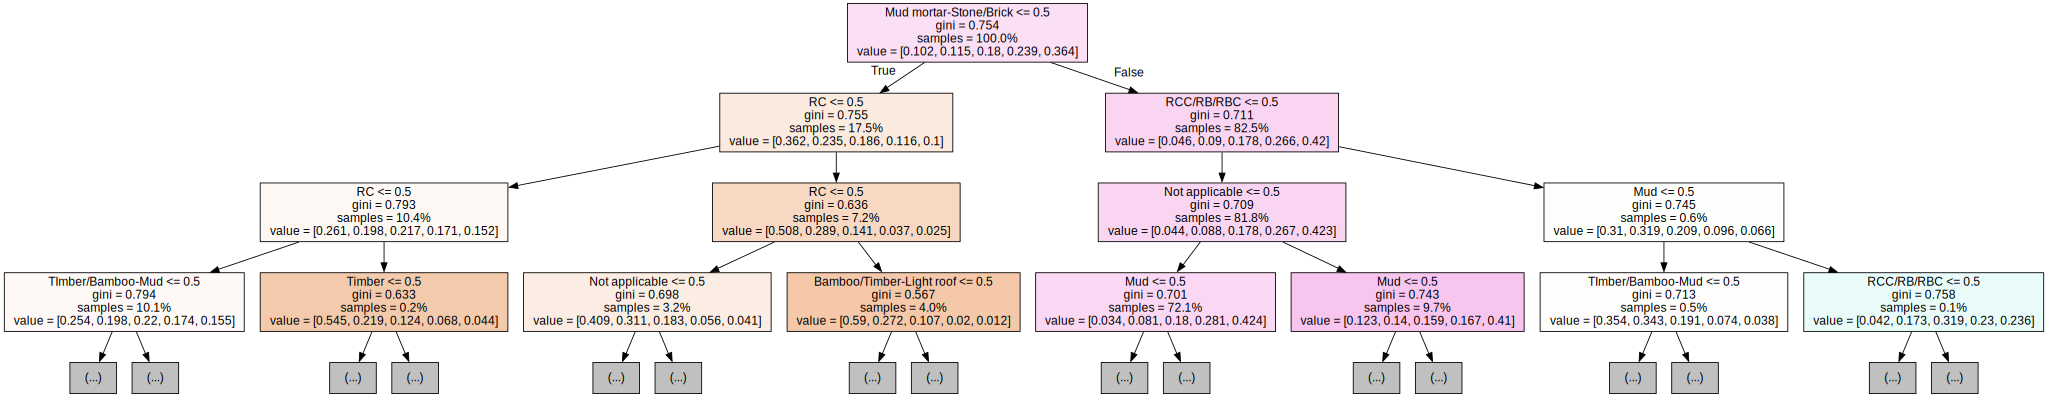

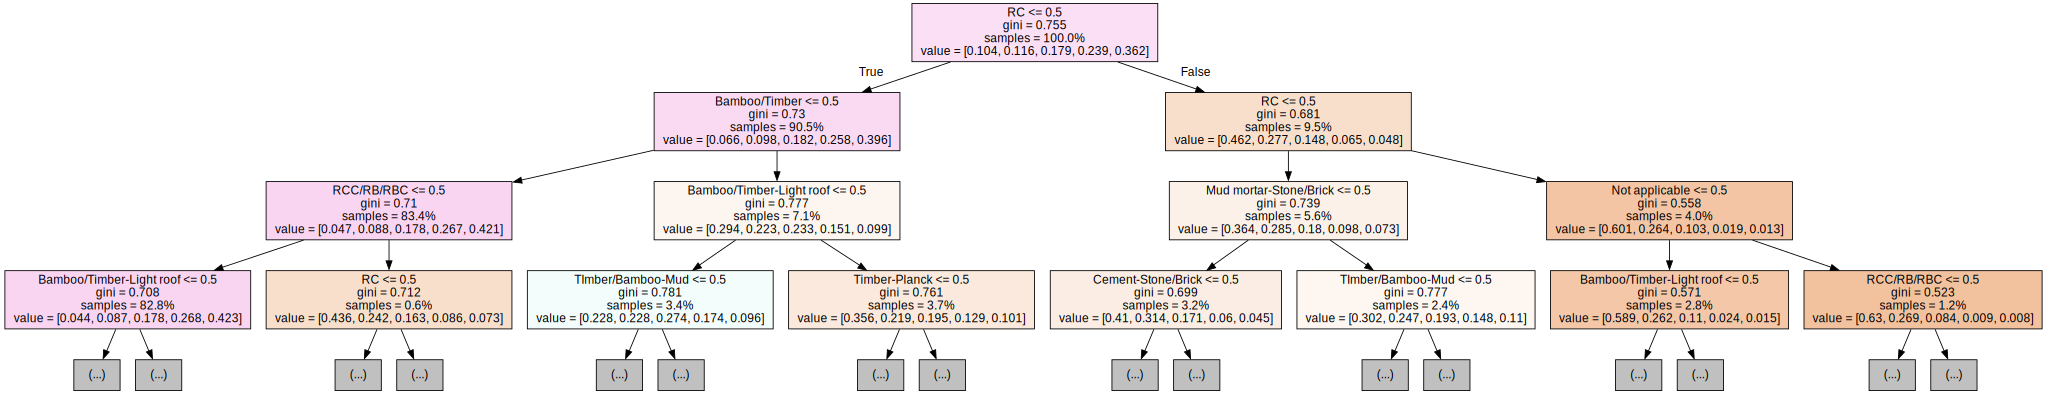

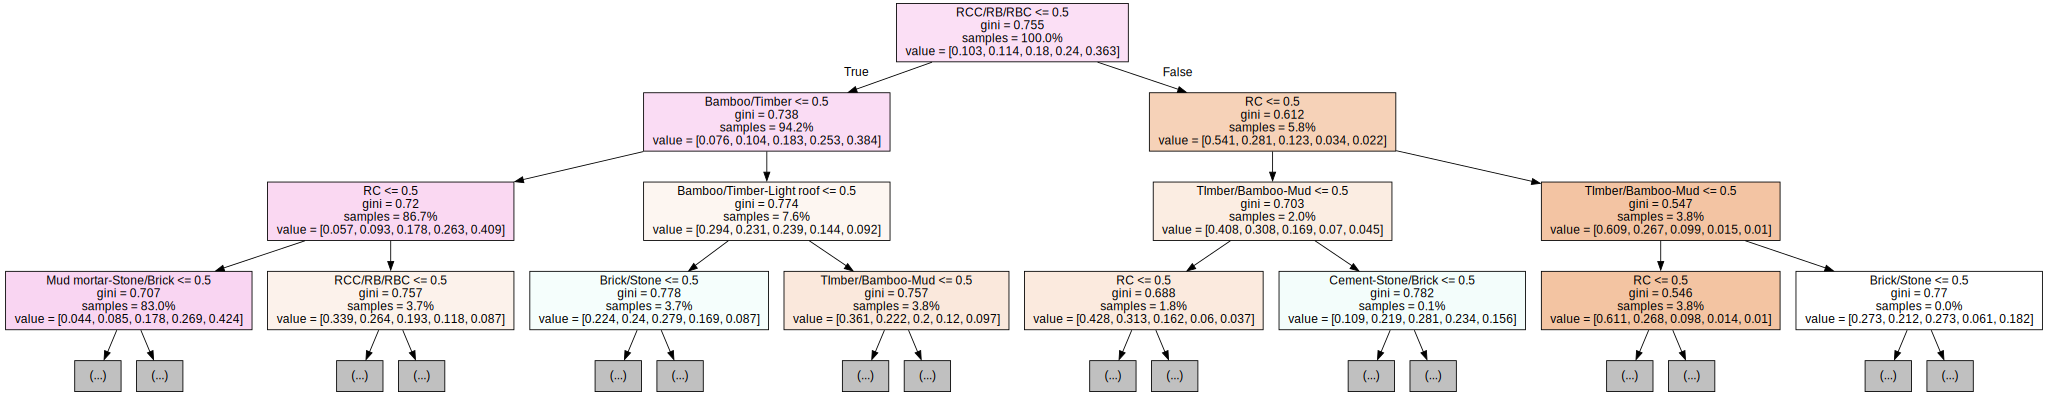

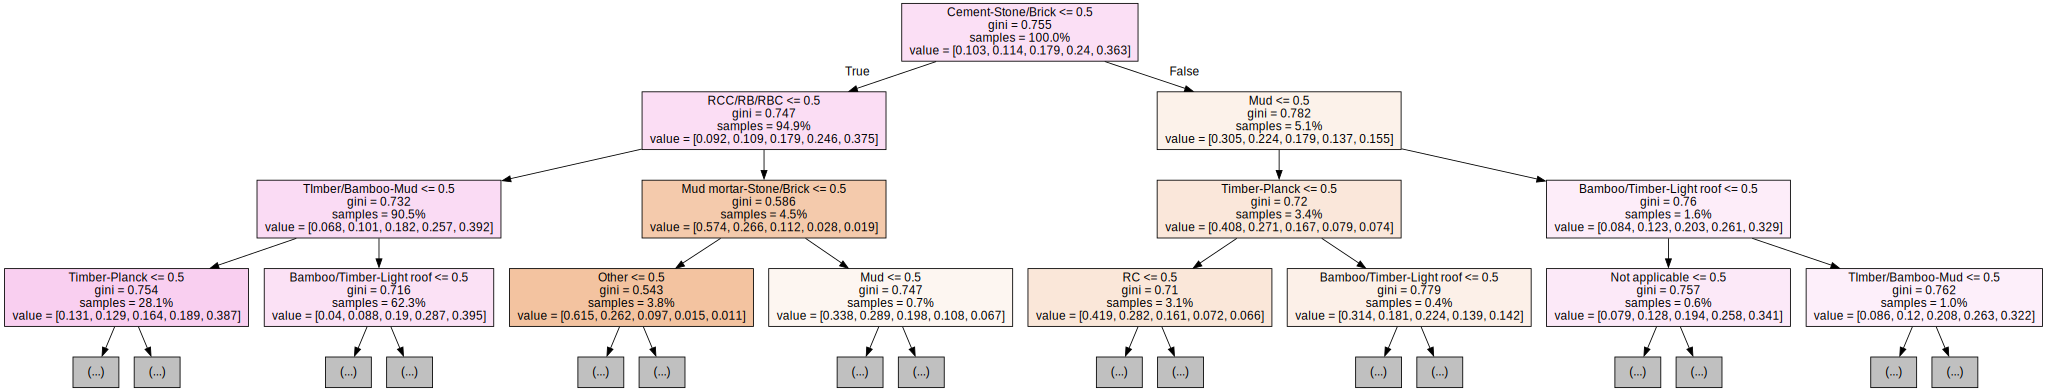

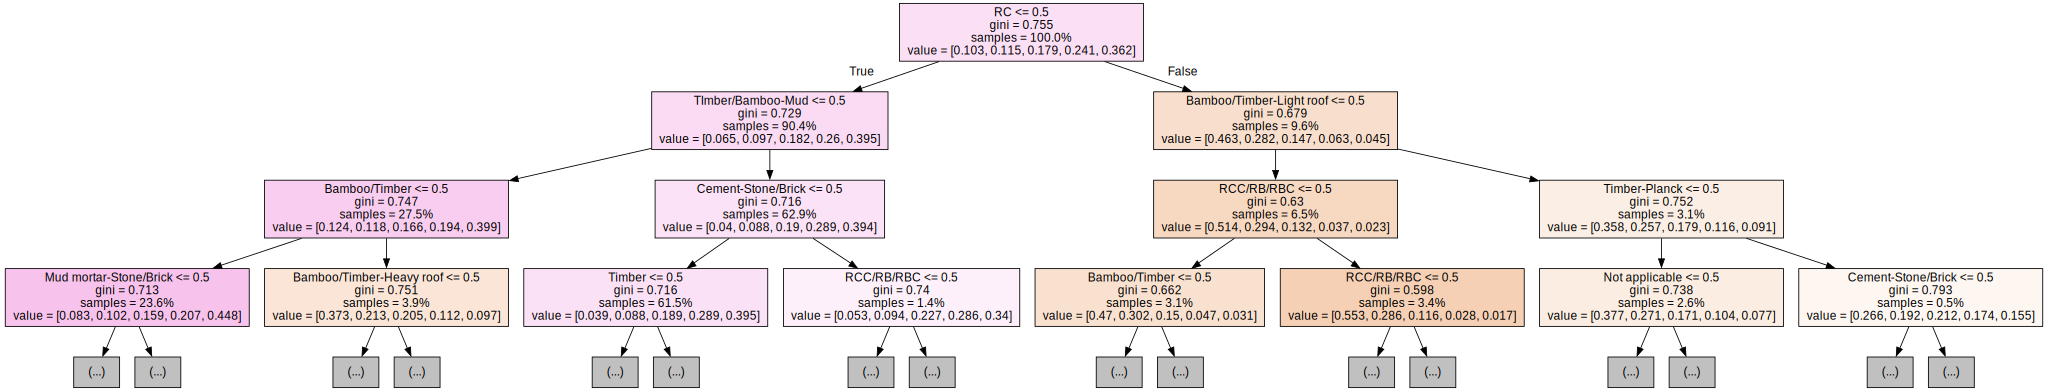

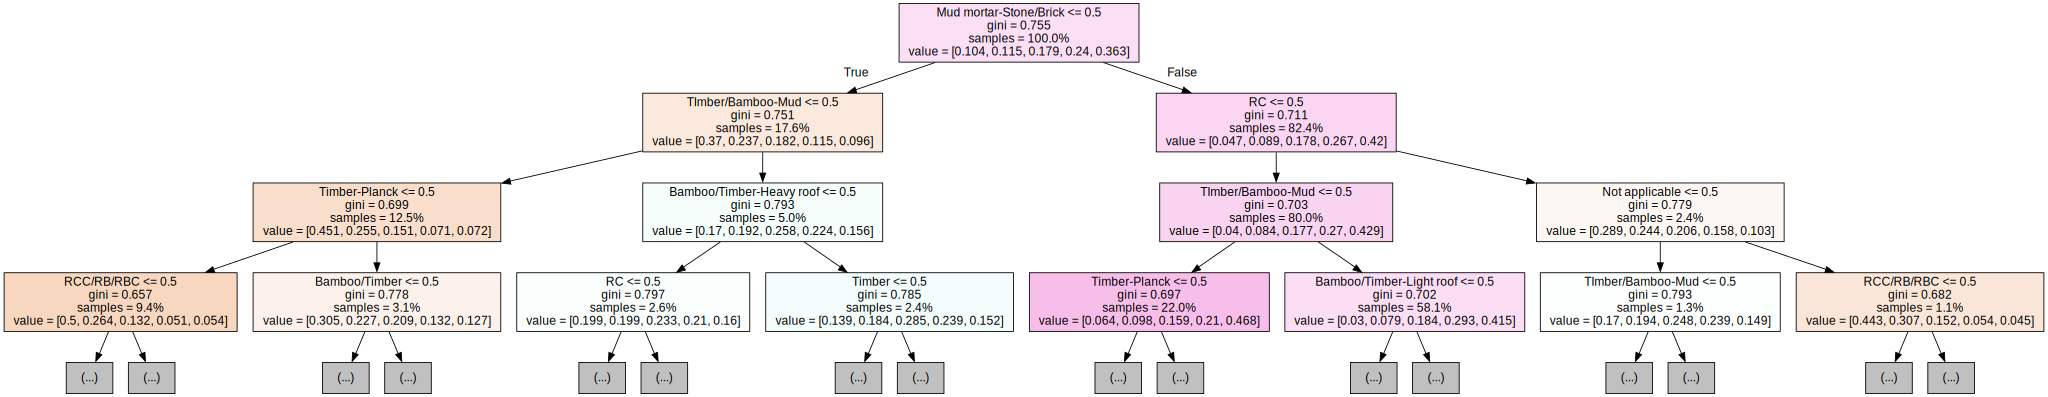

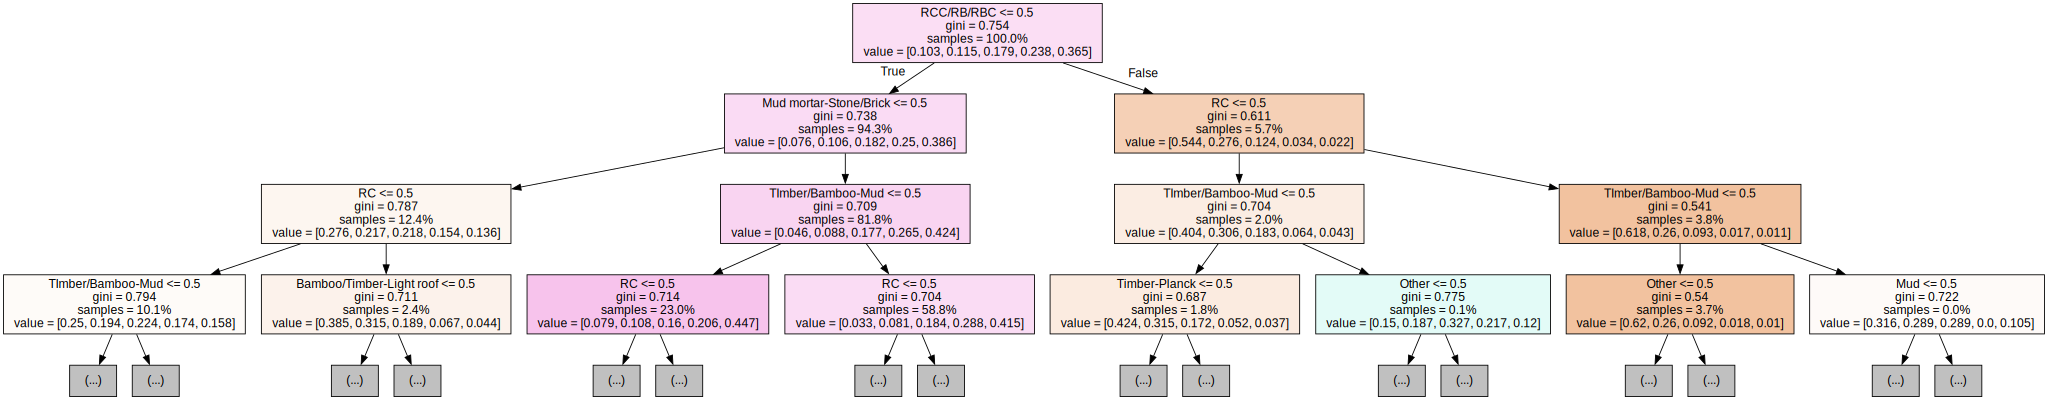

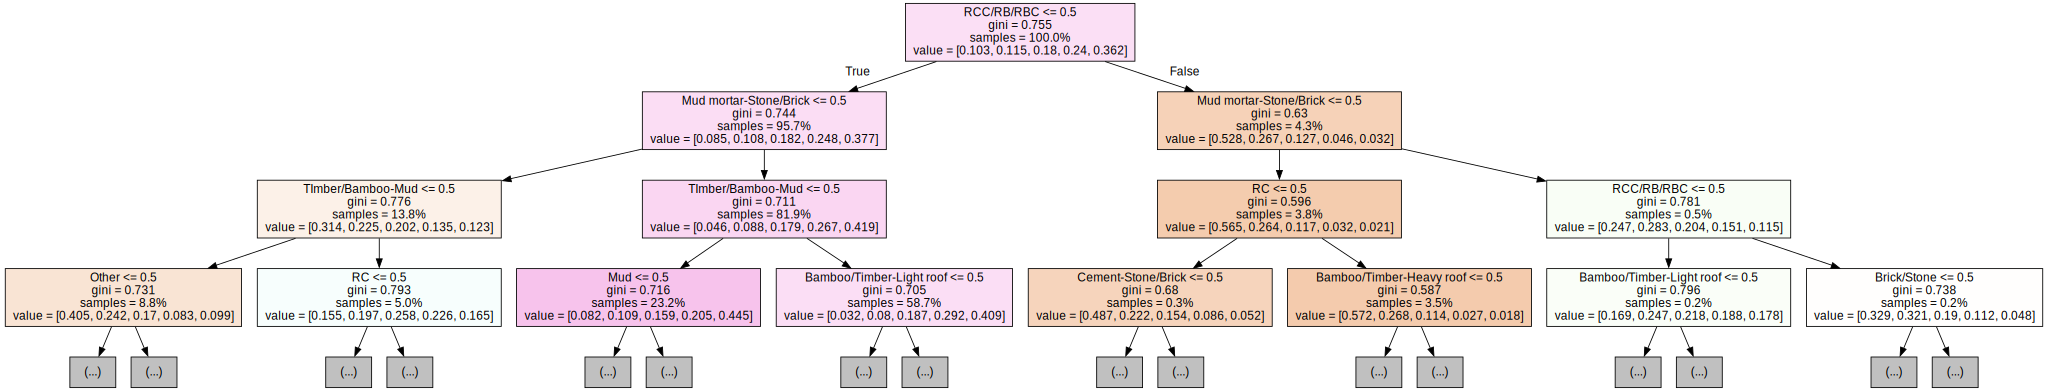

<Figure size 3000x3000 with 0 Axes>

In [55]:
f = plt.figure(figsize=(30,30))

for i in range(10):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=train_pred.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=True, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### From these 10 Random Forest trees, the most popular choice is Bamboo/Timber across all 4 variables. The second most popular choice is Reinforced Concrete (RC). According to the trees, there are no runner-ups to the first two choices this time.

### By comparing with the Chi Square value result earlier, we can confirm that Reinforced Concrete (RC) is an primary contributor to a building's damage grade. However, the most unexpected result was with Bamboo/Timber materials as it ranked the lowest in terms of importance level against damage grade.

## Conclusion to main problem statement


### Overall, based on our question "Which building materials contribute to the building's damage grade?", we can safely conclude that for a building's superstructure, Cement-Mortar Brick and RC Non Engineered materials are the most significant contributors to damage grade. Meanwhile for a building's foundation, Reinforced Concrete and Bamboo/Timber materials are the biggest contributors to damage grade.

### Although, the caveat is that the accuracy of this conclusion is not satisfactory enough as both Logistic Regression Model and Random Forest show an accuracy score of around 0.4 .

## Conclusion to second problem statement

### Second problem statement: "Does building age contribute to damage grade?"

### Here, we will add building age to both superstructure material data set and building foundation variable data set and use Random Forest Model to find out whether building age plays a role in conbtributing to the damage of a building.

### Superstructure matched with building age

In [56]:
merge = pd.concat([bldg_age, ss_rc_eng, ss_rc_non_eng, ss_bamboo, ss_timber, ss_mmstone, ss_cmbrick], axis = 1)
train_pred, test_pred, train_resp, test_resp = train_test_split(merge,dmg_grade, test_size = 0.3, random_state = 42)
rf = RandomForestClassifier()
rf.fit(train_pred, train_resp)
predictor = rf.predict(test_pred)
accuracy = accuracy_score(test_resp, predictor)
print('Accuracy of Superstructure Random Forest: {:.2f}'.format(accuracy))

Accuracy of Superstructure Random Forest: 0.42


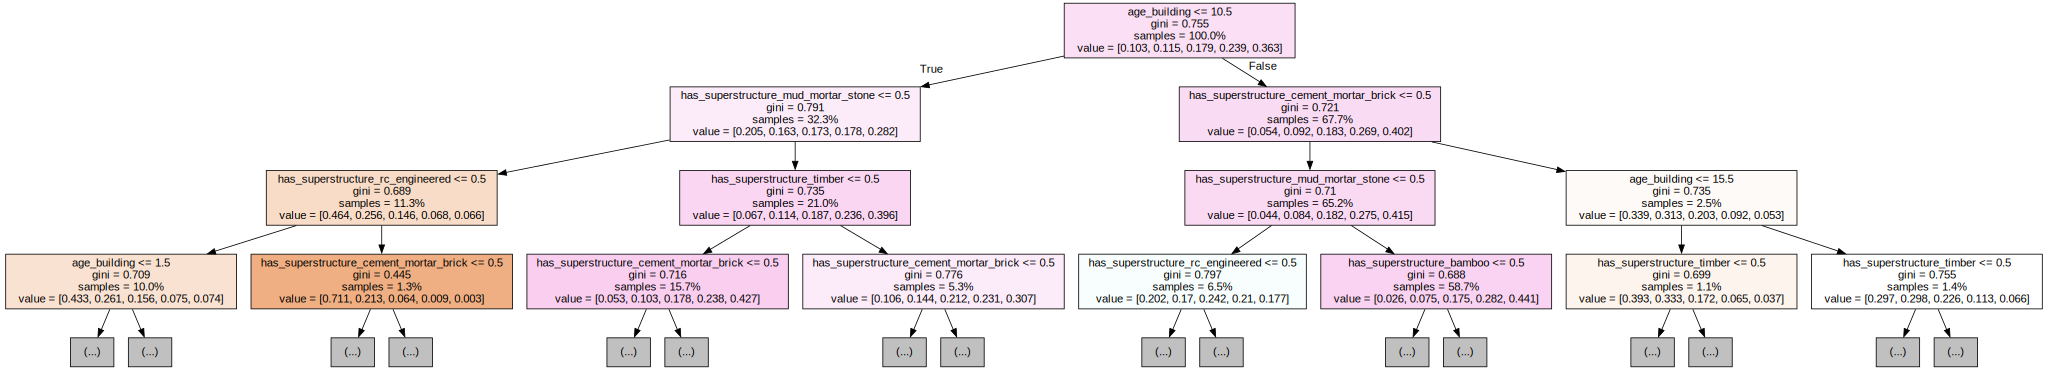

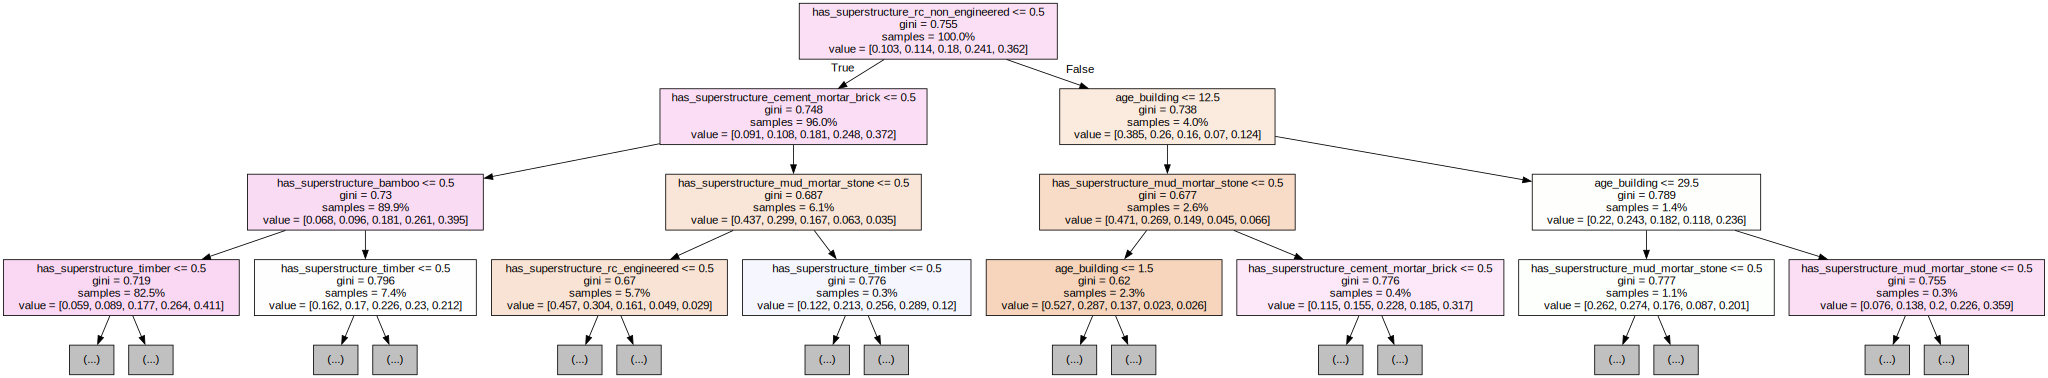

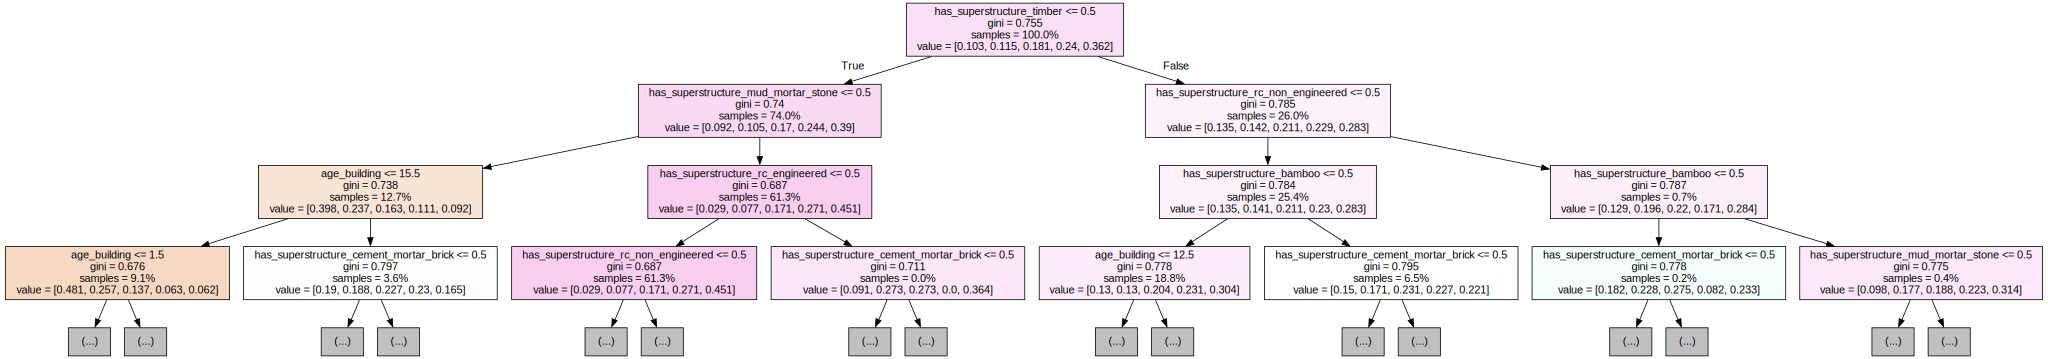

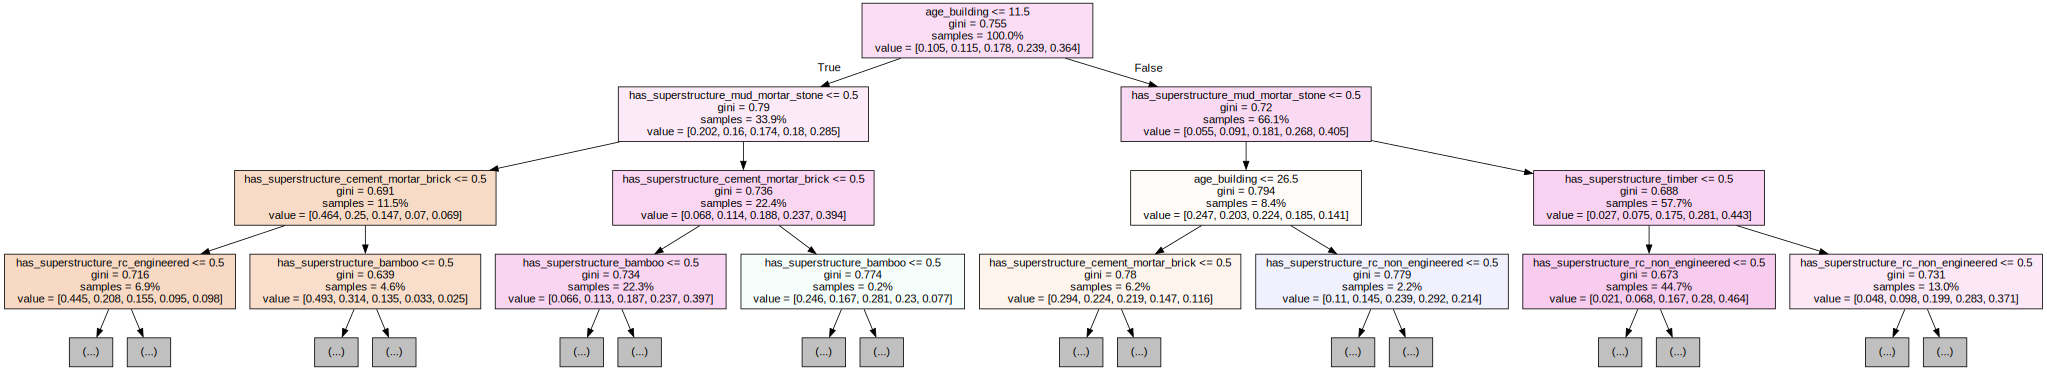

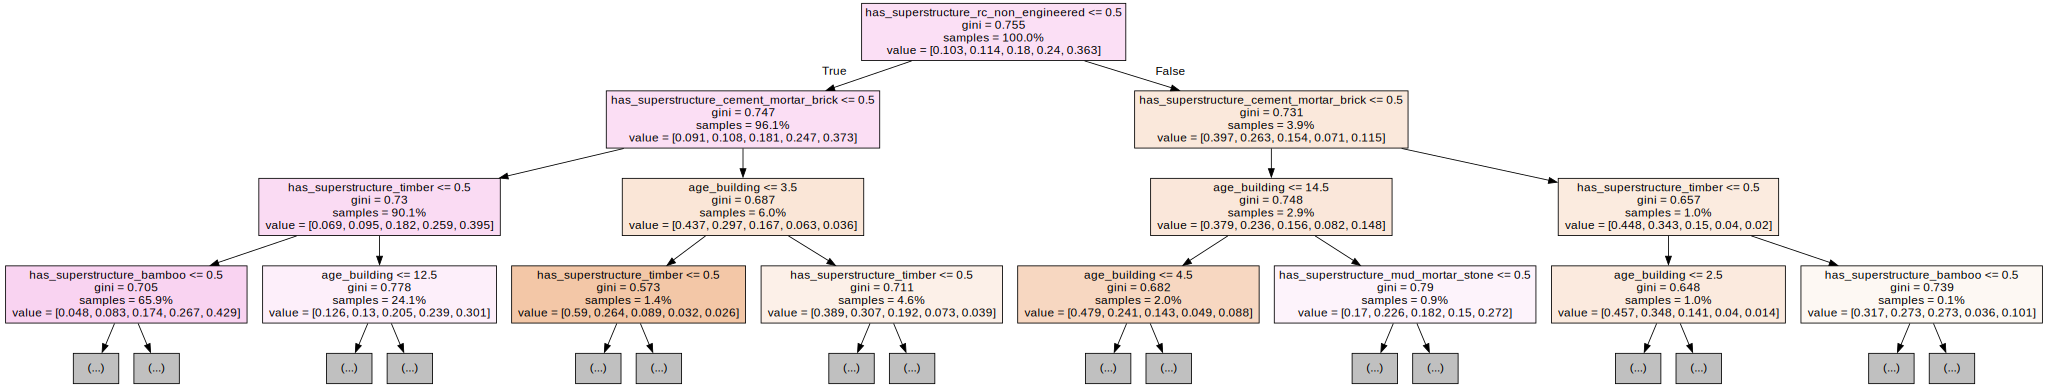

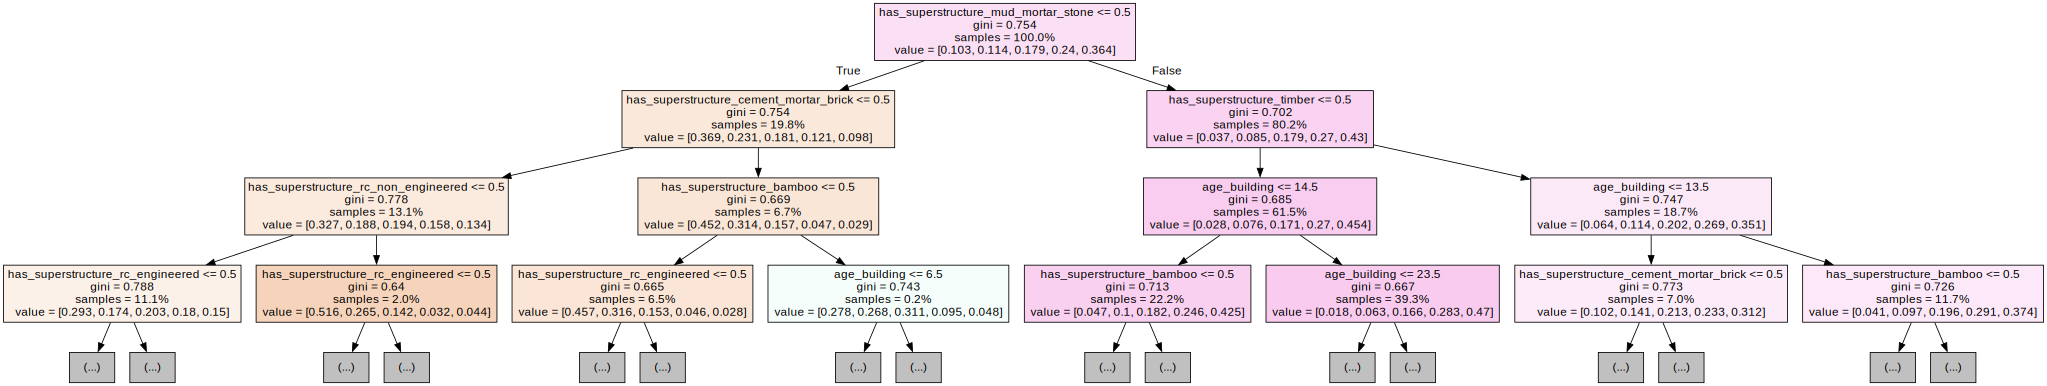

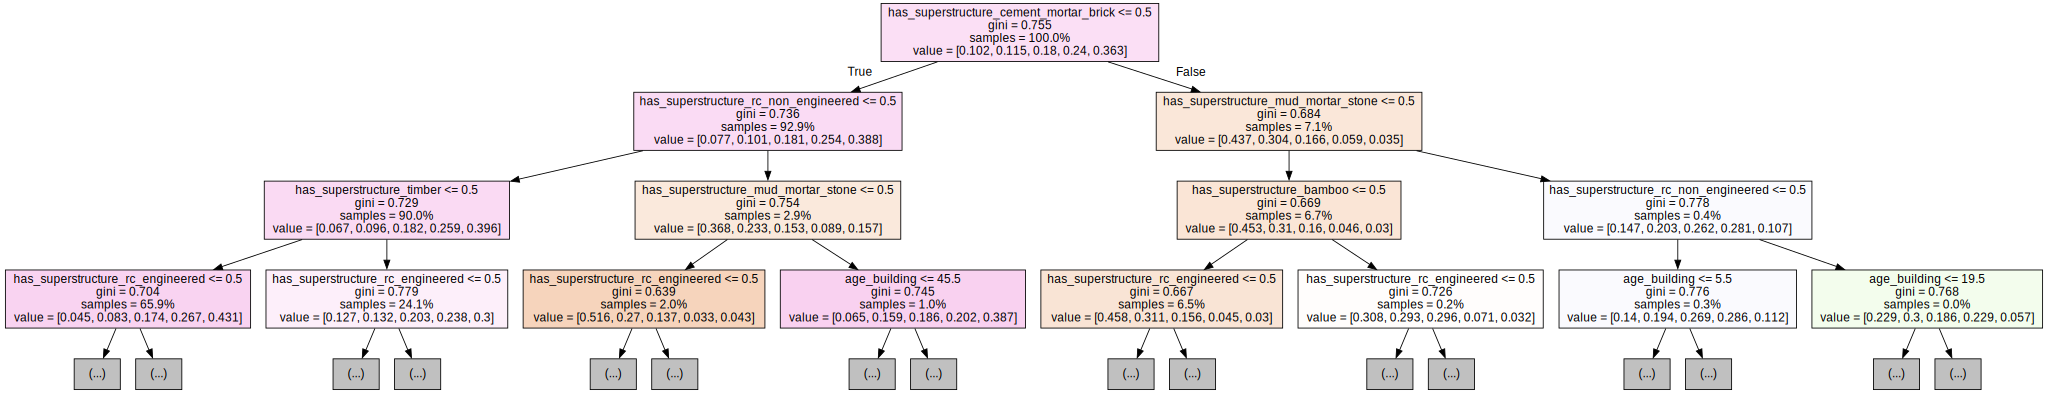

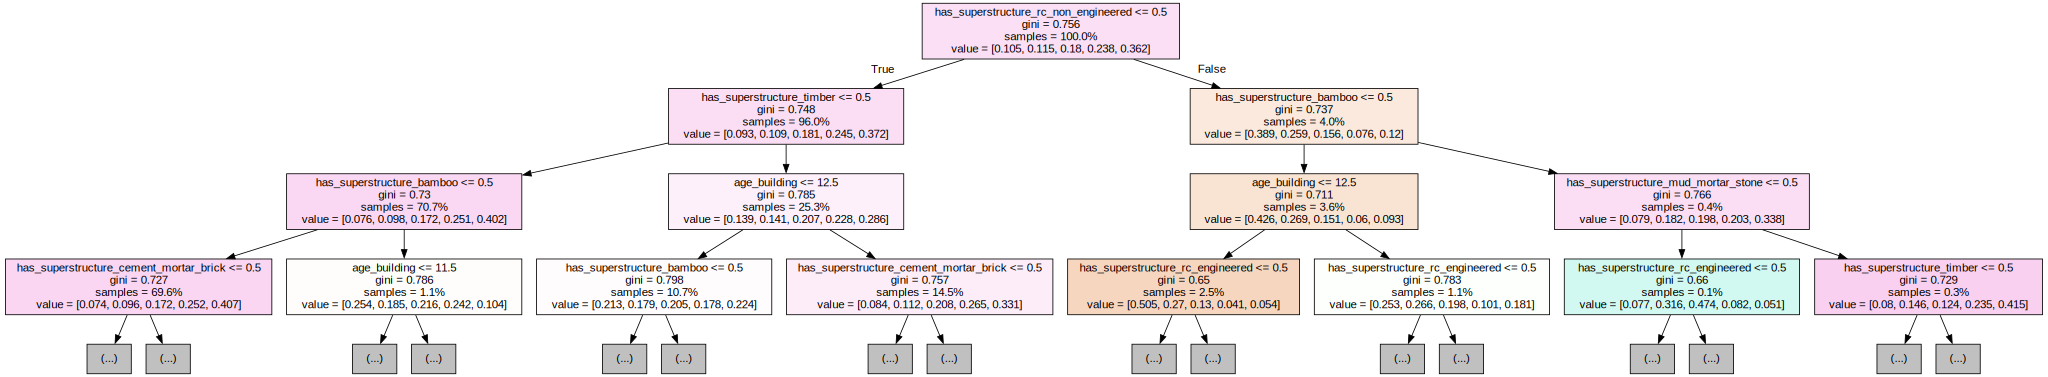

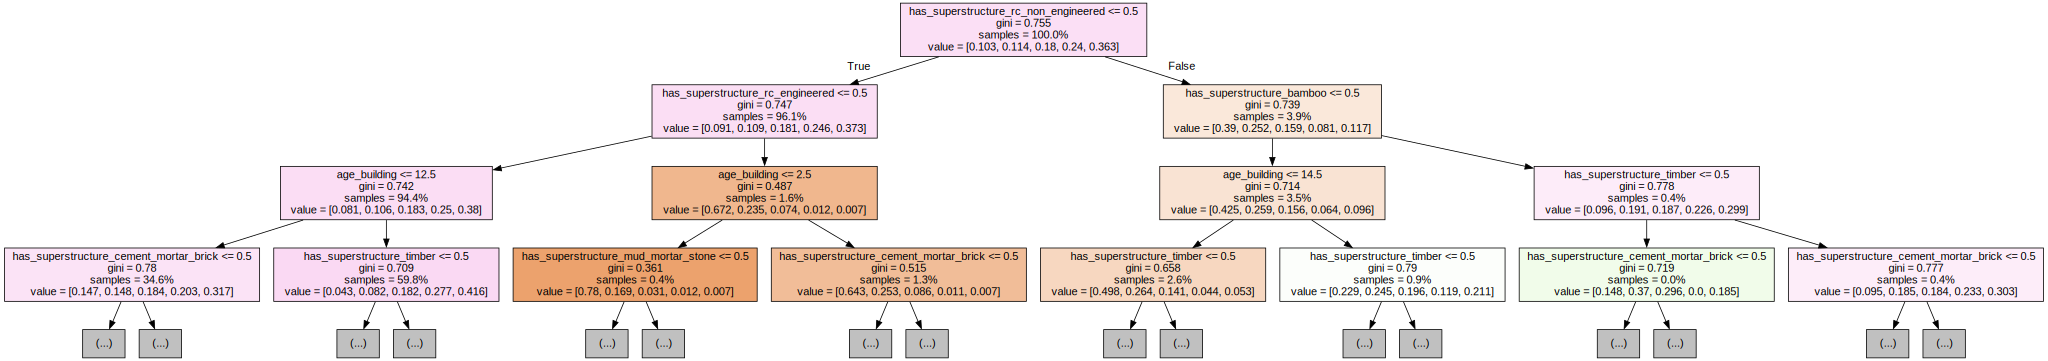

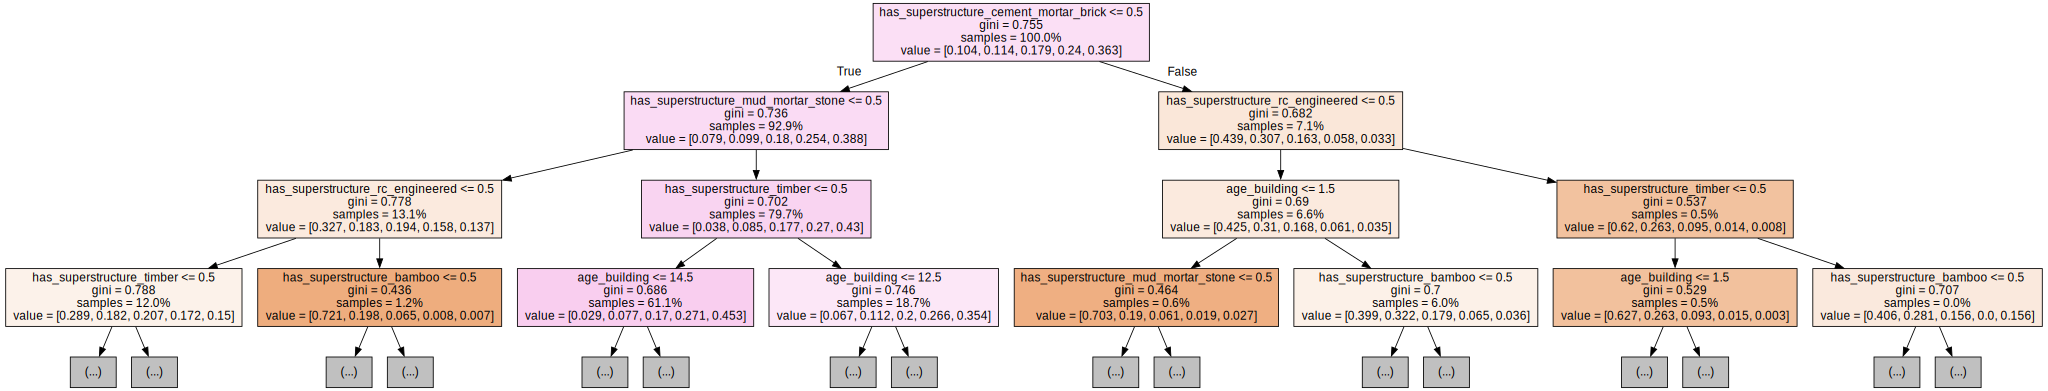

<Figure size 3000x3000 with 0 Axes>

In [57]:
f = plt.figure(figsize=(30,30))

for i in range(10):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=train_pred.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=True, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### Building foundation variables matched with building age

In [58]:
merge = pd.concat([bldg_age, foundation_type_encoded, gf_type_encoded, otherFloor_type_encoded, roof_type_encoded], axis = 1)
train_pred, test_pred, train_resp, test_resp = train_test_split(merge,dmg_grade, test_size = 0.3, random_state = 42)
rf = RandomForestClassifier()
rf.fit(train_pred, train_resp)
predictor = rf.predict(test_pred)
accuracy = accuracy_score(test_resp, predictor)
print('Accuracy of Building Foundation Random Forest: {:.2f}'.format(accuracy))

Accuracy of Building Foundation Random Forest: 0.42


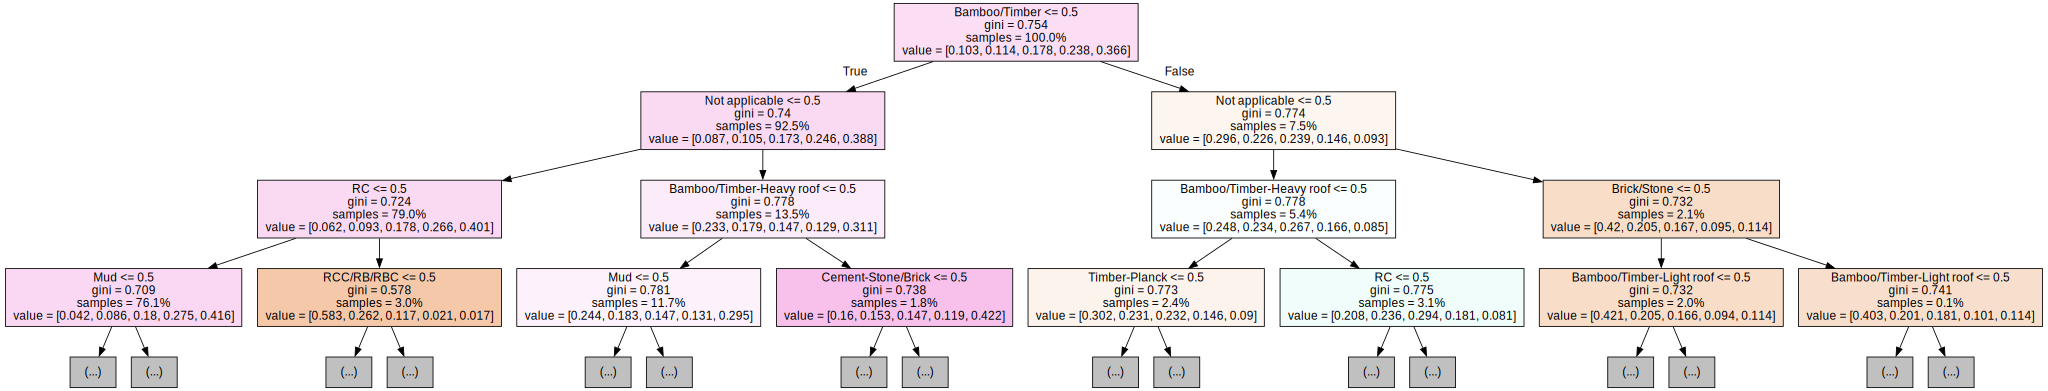

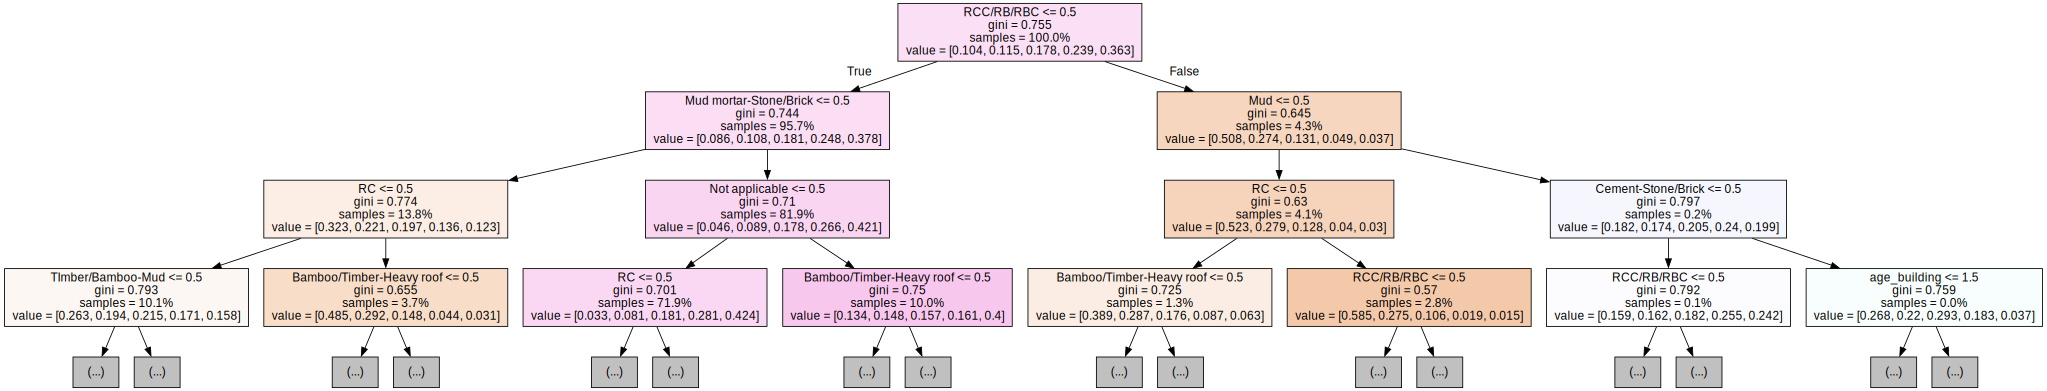

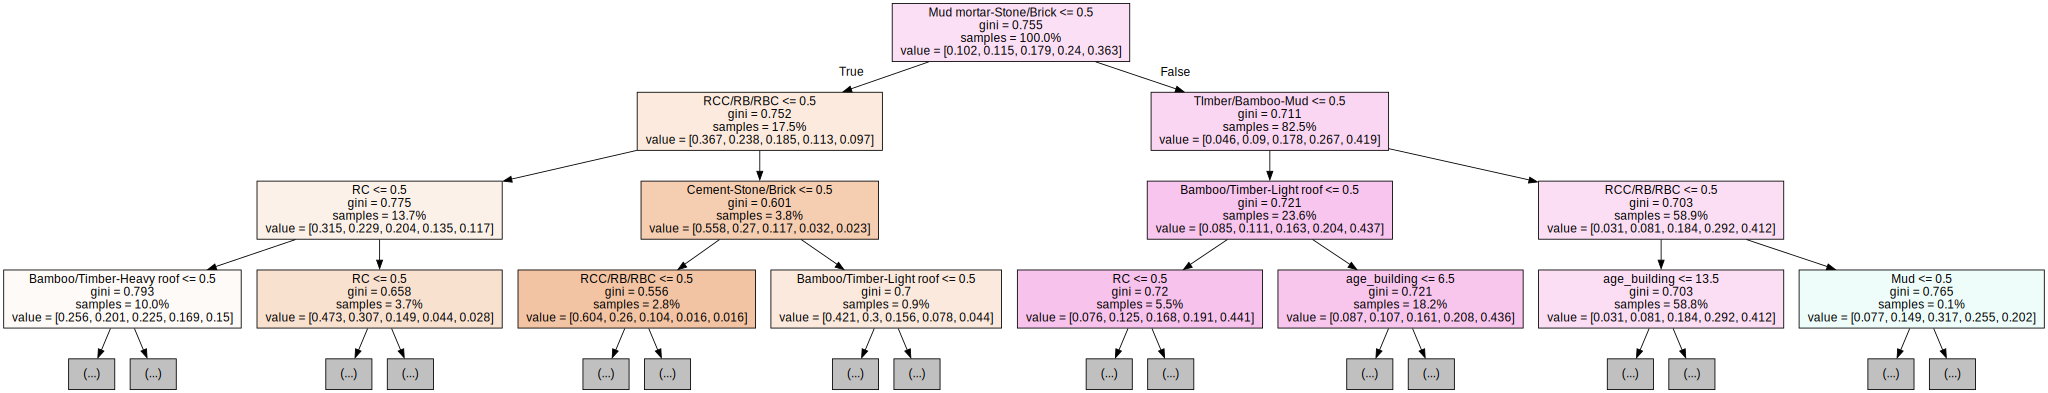

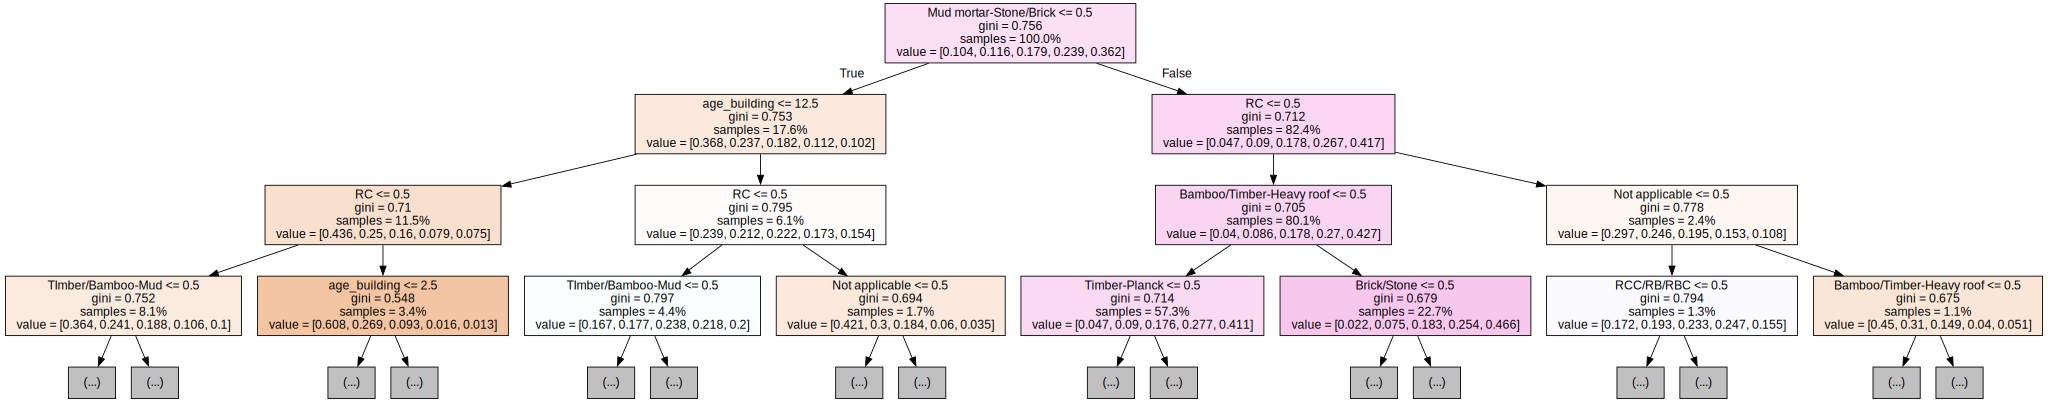

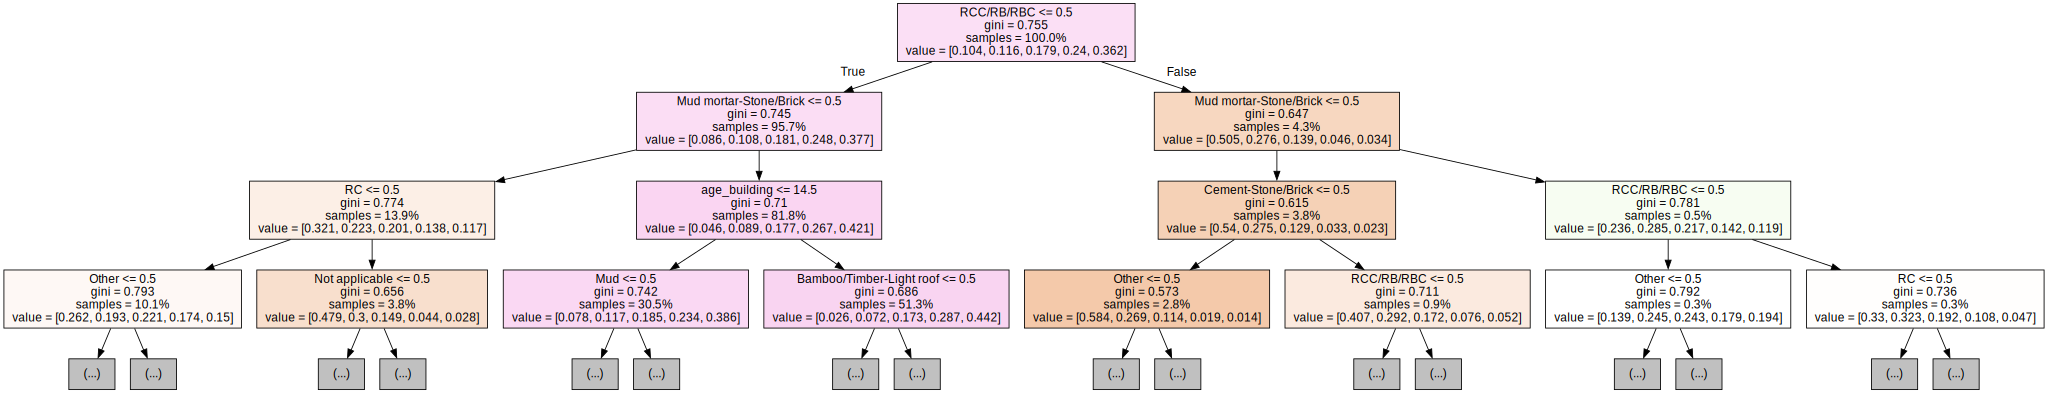

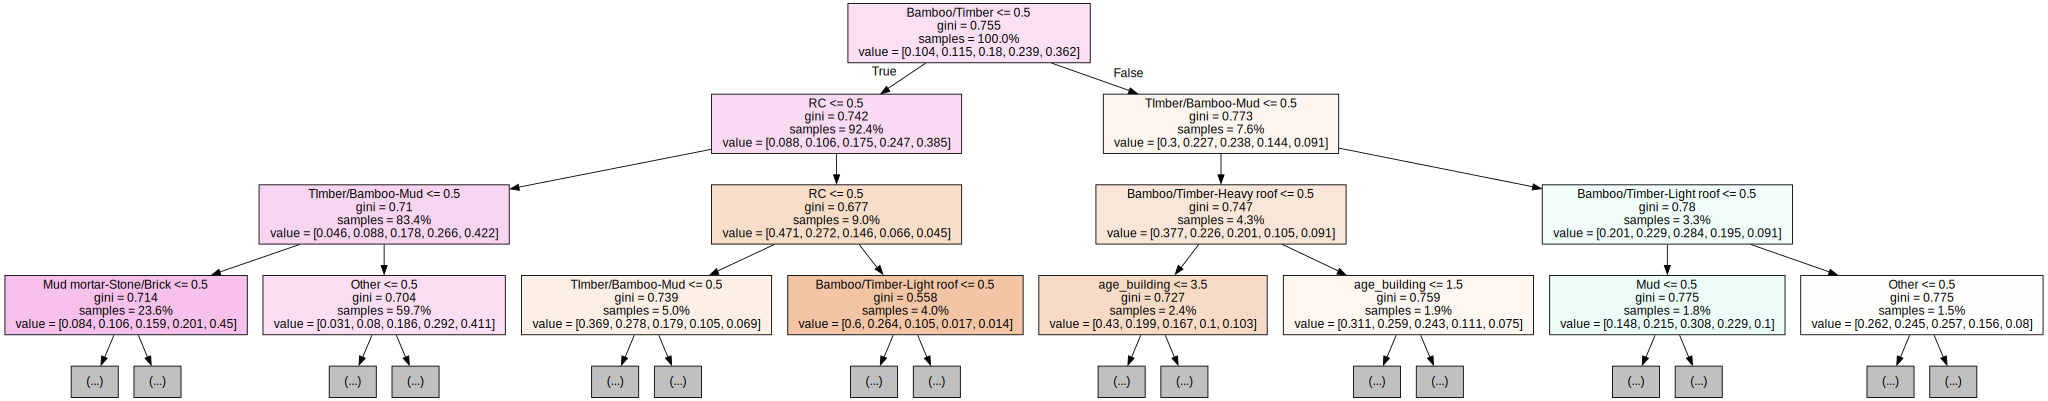

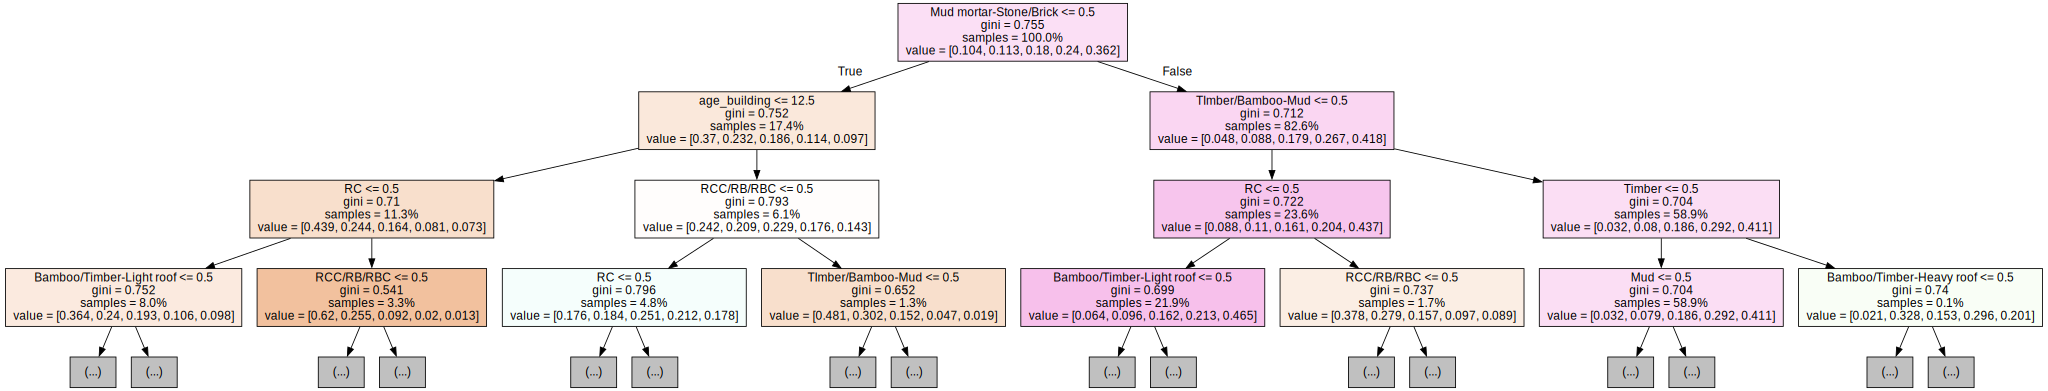

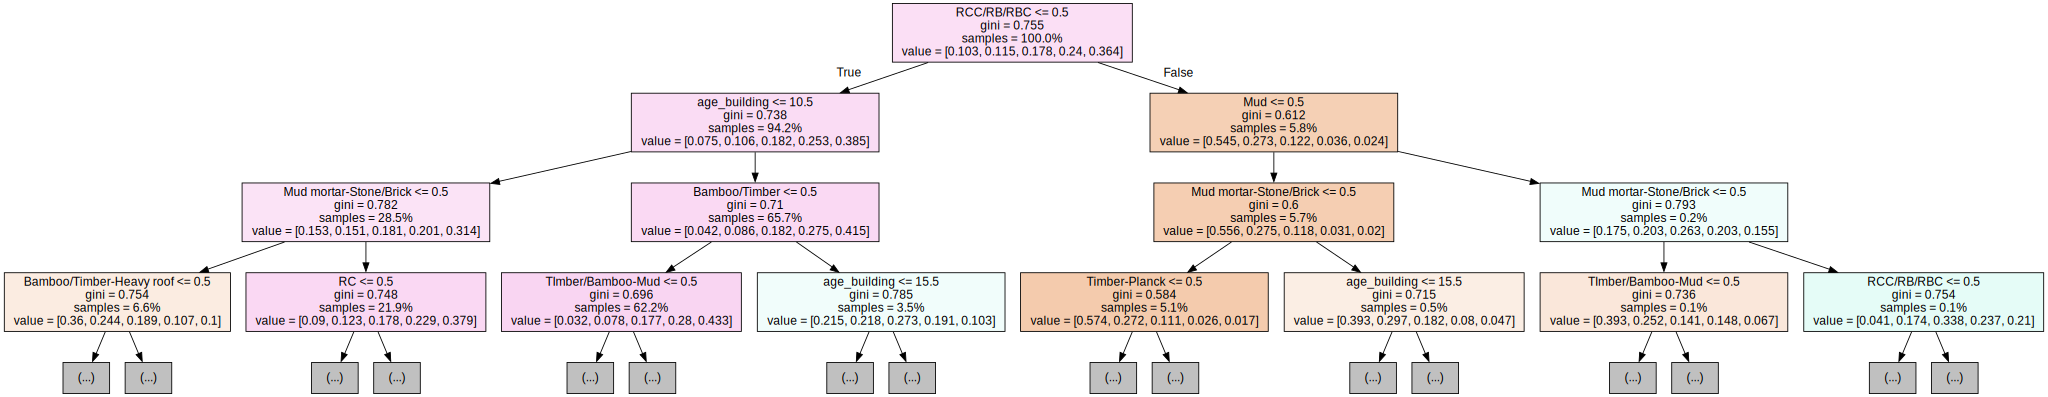

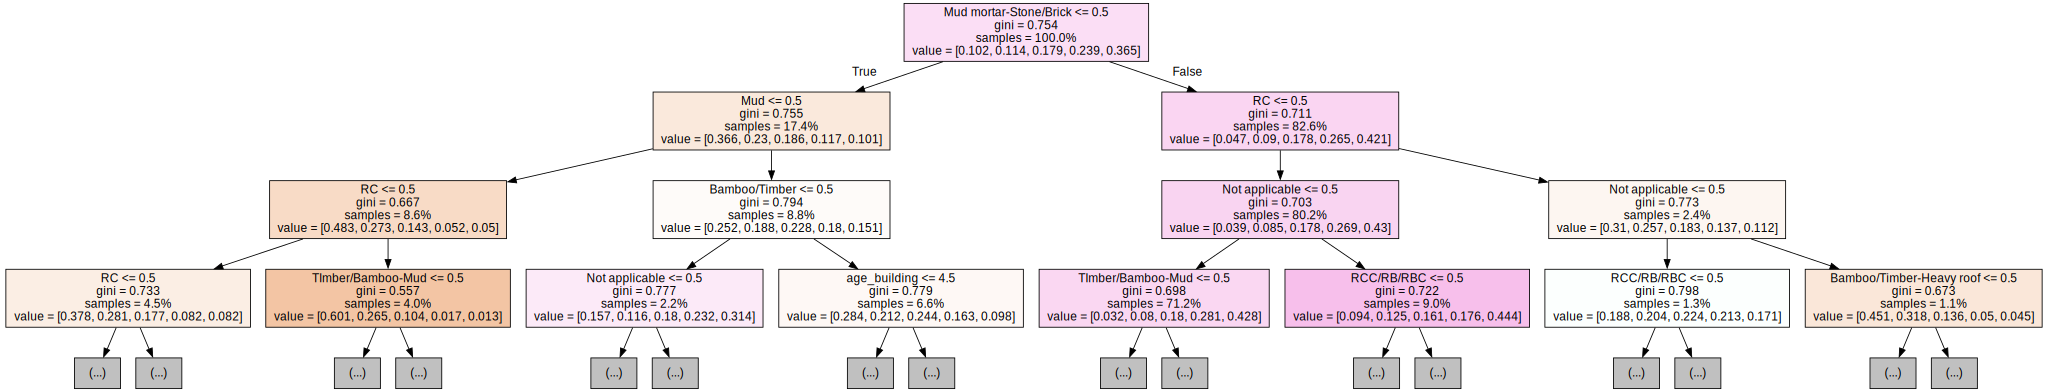

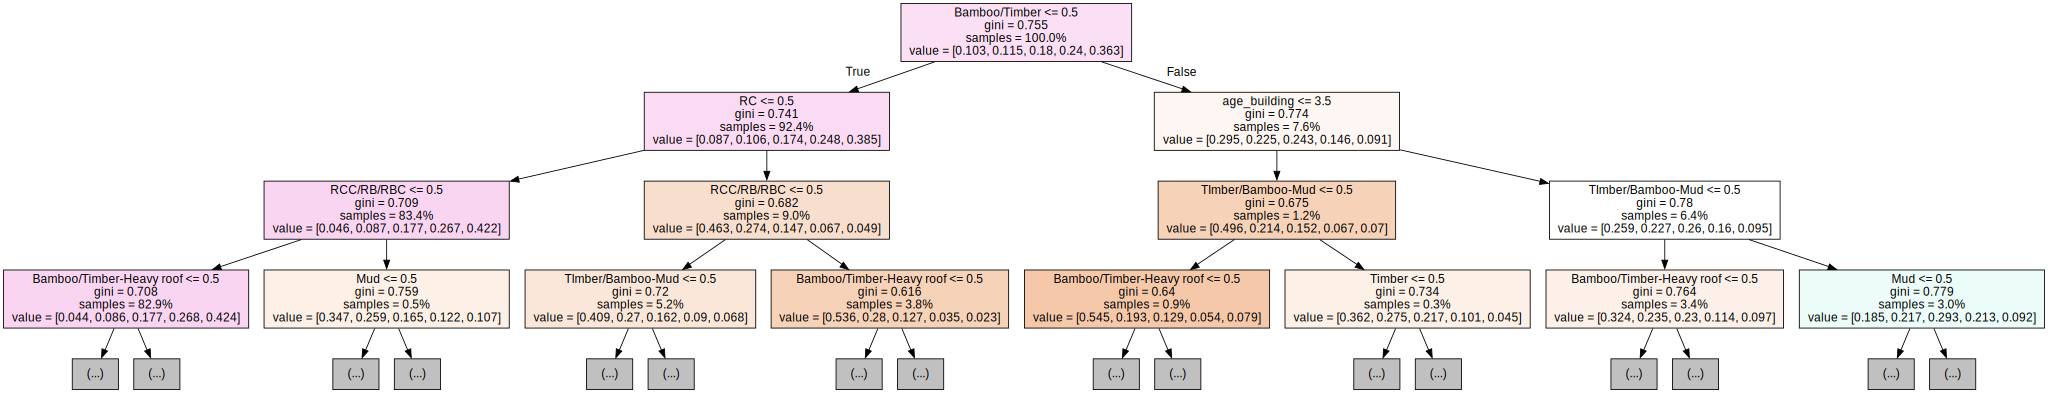

<Figure size 3000x3000 with 0 Axes>

In [59]:
f = plt.figure(figsize=(30,30))

for i in range(10):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=train_pred.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=True, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### As we can see, the Random Forest trees most popular choice is building age when placed together with superstructure variables as an predictor for damage grade. It overtook the other superstructure materials as a contributor. 

### However, when looking back at the Chi Square value results, building age has an extremely higher value than the other variables. Hence, there is a skewed bias for building age, but our conclusion is still sound since in our EDA step, we saw that the damage grades of 1 to 5 are spread across the range of building age.

### Although, when placing building age together with the variables related to a building's foundation, building age was not a solid choice to predict damage grade. This also does not compare well when looking at the Chi Square value again.

### From this, "Does building age contribute to damage grade?". Based on the Random Forest tree results, our group's deems that building age may be an contributor. Similarly, in the real world, there are historical buildings which have stood for hundreds of years, and during earthquakes they may receive some damage. Hence, our conclusion is that building age can be a contributor, but not a significant one.